# Dependencies

In [1]:
pacman::p_load( ggpubr,
    igraph, graphlayouts, 
    dplyr, ggplot2, 
    GUniFrac, ggsignif,
    iNEXT, ggrepel
)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [3]:
baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, binw, pointsize) {
    p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar)))) +
        ggdist::stat_dist_halfeye(adjust = 0.5, .width = 0, justification = -0.1, point_color = NA, width = 0.7) +
        geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
        ggdist::stat_dots(side = "left", justification = 1.1) +
        scale_fill_manual(values = colpal) +
        myaxis +
        myplot +
        theme(legend.position = "none") +
        #scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
        labs(x = "", y = gsub("`", "", yvar))
    return(p0)
}


In [4]:
set.seed(111)
baseplot.fx <- function(mydf, x, y, fill, clr, colpal) {
    p1 <- ggplot(mydf, aes(x = factor(eval(parse(text = x))), y = eval(parse(text = y)), color = eval(parse(text = clr)), fill = eval(parse(text = fill)))) +
        geom_jitter(width = 0.1, height = 0.1, alpha = 0.2) +
        geom_boxplot(outlier.shape = NA, alpha = 0.1) +
        # geom_smooth(method = "loess", se = TRUE, aes(group = 1), color = "black", fill = "grey") +
        myplot +
        myaxis +
        scale_color_manual(values = colpal) +
        scale_fill_manual(values = colpal) +
        theme(legend.position = "none") +
        labs(x = x, y = gsub("`", "", y))
    return(p1)
}


# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

# Main

# Create summary tables

In [14]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [15]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [9]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v5/gliph_output/int_vdj_v5_cluster.csv"), col_names = T) #  gliph reference dataset  is MItechel

ERROR: Error: '/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph//v5/gliph_output/int_vdj_v5_cluster.csv' does not exist.


In [ ]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [10]:
head(gliph_out)

ERROR: Error in head(gliph_out): object 'gliph_out' not found


In [14]:
# no single
tmp <- gliph_out[ gliph_out$pattern != "single",]

# only those patterns with CHP samples
importantgliphs <- tmp$pattern[ grepl("CHP", tmp$Sample)]
tmp <- tmp[ tmp$pattern %in% importantgliphs,]

In [15]:
dim(tmp)

[1] 76075    18

In [16]:
tmp$subject <- gsub(":.*", "", tmp$Sample)

In [ ]:
readr::write_rds(tmp, file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [ ]:
gliph_out <- readr::read_rds(file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [ ]:
rm(tmp)

Create a gliph dataframe

In [ ]:
gliphdf <- data.frame(gliph = unique(gliph_out$pattern))
rownames(gliphdf) <- gliphdf$gliph

In [ ]:
head(gliphdf)

In [ ]:
head(gliph_out[, c("subject", "Sample")])

In [ ]:
names(table(gliph_out$subject[!grepl("CHP", gliph_out$Sample)]))

In [ ]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliph_out[gliph_out$pattern == gliphdf$gliph[i],]
# add gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)

gliphdf$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)

gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)
gliphdf$HTLV1[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(grepl("HTLV-1", mygliph$subject)), 0)
gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [ ]:
head(gliphdf)

In [ ]:
colnames(gliph_out)

In [ ]:
# add number of unique cdr3s for each group
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out[gliph_out$pattern == gliphdf$gliph[i], ]
    gliphdf$n_unique_cdr3[i] <- mygliph$number_unique_cdr3[1]
}


In [ ]:
head(gliphdf)

Create CHP samples x gliph dataframe

In [ ]:
mysamples <- names(table(gliph_out$Sample[grepl("CHP", gliph_out$Sample)]))

In [ ]:
colnames(gliphdf)[2:14]

In [ ]:
samples_tcr <- as.data.frame(matrix(0, nrow = length(mysamples), ncol = 13, 
dimnames = list(mysamples, colnames(gliphdf)[2:14])) ) 

In [ ]:
head(samples_tcr)

In [ ]:
# count number of TCRs with annotated gliph groups for each sample
# # eg if 3 TCRs are annotated to a one gliph group with HPV annotation, then count it as 3
for (i in 1:nrow(samples_tcr)) {
    samplegliphs <- gliph_out$pattern[gliph_out$Sample == rownames(samples_tcr)[i]]
    mytab <- as.data.frame(table(gliph_out$subject[gliph_out$pattern %in% samplegliphs]), stringsAsFactors = F)
    mycols <- intersect(colnames(samples_tcr), mytab$Var1)
    samples_tcr[i, mycols] <- mytab$Freq[match(mycols, mytab$Var1)]
}

In [ ]:
# # count number of annotated gliph groups for each sample
# # eg if 3 TCRs are annotated to a one gliph group with HPV annotation, then count it as 1
# for (i in 1:nrow(gliphdf)) {
#     mygliph <- gliph_out[gliph_out$pattern == rownames(gliphdf)[i], ]
#     sample_subject_tab <- as.data.frame.matrix(table(mygliph$Sample, mygliph$subject))
#     if (sum(grepl("CHP", rownames(sample_subject_tab))) > 0) {
#         # subset to  samples
#         sample_subject_tab <- sample_subject_tab[grepl("CHP", rownames(sample_subject_tab)), ]
#         # select same samples in samples_tcr, then match colnames
#         samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] <-
#             samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] + 1
#     }
# }


In [ ]:
tail(samples_tcr)

In [ ]:
# fill n_cdr3 for each sample
# make a samplename to match subject:condition of gliph_out
meta_div$samplename <- paste0(meta_div$cancergroup, ":", meta_div$Patient, "_", meta_div$cycle, "-", meta_div$sampletype)
meta_div$samplename <- gsub(" ", "", meta_div$samplename)

In [ ]:
samples_tcr$n_cdr3 <- meta_div$TRB[ match(rownames(samples_tcr), meta_div$samplename) ]
samples_tcr$cdr3_reads <- meta_div$Reads[ match(rownames(samples_tcr), meta_div$samplename) ]

In [ ]:
colnames(meta_div)

In [ ]:
# fill n_gliph for each samples

In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliph_out %>% select(pattern, Sample)))

In [ ]:
pat_type <- pat_type[, grepl("CHP", colnames(pat_type))]

In [ ]:
head(pat_type)

In [ ]:
pat_type[ pat_type > 0] <- 1 # sometimes for one sample there are two CDR3s grouped in one cluster, recode to 1 to count once

In [ ]:
# fill n_gliph for each samples
n_gliph <- colSums(pat_type)

In [ ]:
samples_tcr$n_gliph <- n_gliph[ match(rownames(samples_tcr), names(n_gliph)) ]

In [ ]:
# get number of unique cdr3s used in gliph for each sample
samples_tcr$n_cdr3ingliph <- NA
samples_tcr$cdr3reads_ingliph <- NA
for (i in 1:nrow(samples_tcr)) {
    mysample <- gliph_out[gliph_out$Sample == rownames(samples_tcr)[i], ]
    samples_tcr$n_cdr3ingliph[i] <- length(unique(mysample$TcRb))
    samples_tcr$cdr3reads_ingliph[i] <- sum(mysample$Freq)
}

In [ ]:
head(samples_tcr)

In [ ]:
# add metadata to samples_tcr
samples_tcr$cancergroup <- gsub(":.*", "", rownames(samples_tcr))
samples_tcr$cycle <- gsub(".*_X", "X", rownames(samples_tcr))
samples_tcr$cycle <- gsub("-.*", "", samples_tcr$cycle)
samples_tcr$sampletype <- gsub(".*-", "", rownames(samples_tcr))

samples_tcr$cyclenum <- as.numeric(gsub("X0", "", samples_tcr$cycle)) 
samples_tcr$Patient <- gsub(".*CHP", "CHP", rownames(samples_tcr))
samples_tcr$Patient <- gsub("_X.*", "", samples_tcr$Patient)

In [ ]:
samples_tcr$Age <- meta_div$Age[match(rownames(samples_tcr), meta_div$samplename)]

In [ ]:
head(samples_tcr)

In [ ]:
# remove normal
samples_tcr <- samples_tcr[samples_tcr$cancergroup != "Normal",]

In [ ]:
table(samples_tcr$cancergroup)

In [ ]:
head(gliphdf)

In [ ]:
readr::write_rds(samples_tcr, file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
readr::write_rds(gliphdf, file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

# Create summary tables for frequencies

In [ ]:
gliphout <- readr::read_rds(file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [ ]:
rm(tmp)

In [ ]:
# use the previous dataframes
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds(file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

In [ ]:
gliphdf_freq <- gliphdf %>% mutate_all(~NA)
gliphdf_freq$n_unique_cdr3 <- NULL
gliphdf_freq$gliph <- NULL

In [ ]:
head(samples_tcr[,1:14])

In [ ]:
columns_to_na <- colnames(samples_tcr)[1:13]

samples_tcr_freq <- samples_tcr %>%
  mutate(across(all_of(columns_to_na), ~NA))

In [ ]:
names(table(gliphout$subject[!grepl("CHP", gliphout$Sample)]))

In [ ]:
for(i in 1:nrow(gliphdf_freq)){

mygliph <- gliphout[gliphout$pattern == rownames(gliphdf_freq)[i],]
# sum Freq of CHP samples if  if mygliph$Sample ciontains CMV
gliphdf_freq$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)

gliphdf_freq$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)

gliphdf_freq$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$HTLV1[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
}

In [ ]:
head(gliphdf)

In [ ]:
head(gliphdf_freq)

In [ ]:
# sanity check
table(gliphout$subject[gliphout$pattern == "S%GGNTE"])
chp <- gliphout$Sample[grepl("CHP", gliphout$Sample)]
sum(gliphout$Freq[gliphout$pattern == "S%GGNTE" & gliphout$Sample %in% chp])
sum(gliphout$Freq[gliphout$pattern == "S%GGNTE"])

In [ ]:
head(samples_tcr_freq)

In [ ]:
colnames(gliphdf_freq)
colnames(samples_tcr_freq)

In [ ]:
myantigens <- c("CMV", "EBV", "HCV", "Influenza", "HomoSapiens", "MDavis", "HPV", "CEF", "TB", "MCPyV", "SP", "DENV")
# count number of annotated gliph groups for each sample
for (i in 1:nrow(samples_tcr_freq)) {
    mysample <- gliphout[gliphout$Sample == rownames(samples_tcr_freq)[i], ]
    for (a in myantigens) {
        tmp <- gliphout[gliphout$pattern %in% mysample$pattern, ] # subset to include patterns in my sample
        antigen_gliphs <- tmp$pattern[grepl(a, tmp$subject)] # get antigen gliphs
        samples_tcr_freq[i, a] <- sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])
    }
}


In [ ]:
# sanity check
mysample <- gliphout[gliphout$Sample == "Leukemia:CHP_323_X03-cfDNA", ]
tmp <- gliphout[gliphout$pattern %in% mysample$pattern, ] 
antigen_gliphs <- tmp$pattern[grepl("HomoSapiens", tmp$subject)]
sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])

In [ ]:
head(samples_tcr_freq)

In [ ]:
colnames(samples_tcr_freq)[1:14]

In [ ]:
# Replace NA values with 0 in columns
columns_to_fill <- colnames(samples_tcr_freq)[1:13]
samples_tcr_freq[columns_to_fill] <- lapply(samples_tcr_freq[columns_to_fill], function(x) ifelse(is.na(x), 0, x))


In [ ]:
head(samples_tcr_freq[,1:13])

In [ ]:
table(samples_tcr_freq$cancergroup)

In [ ]:
readr::write_rds(samples_tcr_freq, file = paste0(datapath, "GLIPH/int_samples_gliphannot_freq_stat.rds"))
readr::write_rds(gliphdf_freq, file = paste0(datapath, "GLIPH/gliphannot_freq_stat.rds"))

# 1- GLIPH groups diversity

to account for cloneCounts and number of groups

In [11]:
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds(file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

In [12]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,HTLV1,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,0,50
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,0,41
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0,0,0,82
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0,0,0,97
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0,0,0,98
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0,0,0,95


In [13]:
dim(gliphdf)

[1] 21321    15

In [14]:
sum(colSums(gliphdf[,2:13] > 0)[c("CMV", "EBV", "HCV", "Influenza", "HPV", "MCPyV")] )
sum(colSums(gliphdf[,2:13] > 0)[c("SP", "TB")] )

[1] 636

[1] 83

In [15]:
gliph_out <- readr::read_rds(file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [16]:
samples_tcr$gliph_div <- NA
# add diversity of gliph groups
for (i in 1:nrow(samples_tcr)) {
  message(i)
  mypt <- gliph_out[gliph_out$Sample == rownames(samples_tcr)[i], ]

  # If there is more than one cdr3 in a pattern, sum the frequencies
  mypt_SumFreq <- mypt %>%
    group_by(pattern) %>%
    summarise(SumFreq = sum(Freq), .groups = "drop")
#message(rownames(samples_tcr)[i])
#print(mypt_SumFreq$SumFreq[order(mypt_SumFreq$SumFreq, decreasing = T)])
  out <- iNEXT::iNEXT(mypt_SumFreq$SumFreq[order(mypt_SumFreq$SumFreq, decreasing = T)], 0, 
  datatype = "abundance", knots = 10, se = F) # no need for se, as we report the AsymEst
  samples_tcr$gliph_div[i] <- out$AsyEst[3, 1] # Simpson
}


1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

Warning message in EstiBootComm.Ind(x[[i]]):
"This site has only one species. Estimation is not robust."
18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

Warning message in EstiBootComm.Ind(x[[i]]):
"This site has only one species. Estimation is not robust."
47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

Warning message in EstiBootComm.Ind(x[[i]]):
"This site has only one species. Estimation is not robust."
65

66

67

68

69

70

71

Warning message in EstiBootComm.Ind(x[[i]]):
"This site has only one species. Estimation is not robust."
72

73

74

75

76

Warning message in EstiBootComm.Ind(x[[i]]):
"This site has only one species. Estimation is not robust."
77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

In [18]:
sampletype <- samples_tcr[samples_tcr$sampletype == "PBMC" & samples_tcr$n_gliph > 2, ] # to avoid error in diversity calculation


In [19]:
sampletype$gliph_div_log <- log10(sampletype$gliph_div)

In [20]:
sampletype$cancergroup[ sampletype$cancergroup == "Solidtumors" ] <- "Solid tumors"
sampletype$cancergroup[ sampletype$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

at baseline

In [21]:
X01 <- sampletype[ sampletype$cycle == "X01",]

In [22]:
tapply(X01$gliph_div_log, X01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2059  0.9660  1.6670  1.5445  2.1594  2.4608 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.581   1.811   1.906   1.908   1.933   2.309 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6825  1.5297  1.8890  1.7705  2.0710  2.4696 

$`T-cell malignancies`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.834   1.130   1.427   1.427   1.723   2.019 


In [23]:
p1 <- baseraincloud_plot.fx(X01, "gliph_div_log", "cancergroup", "cancergroup", group_col, 0.5,0.4)

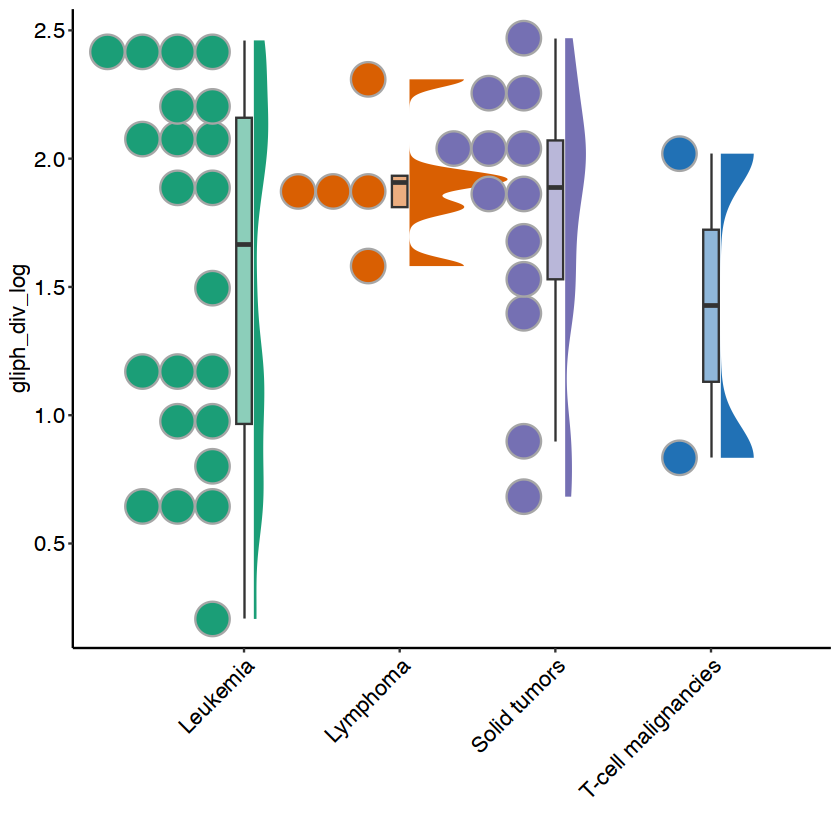

In [24]:
p1

In [25]:
mytest <- "gliph_div_log"
ks.test(X01[[mytest]][ which(X01$cancergroup == "Solid tumors")], X01[[mytest]][ which(X01$cancergroup == "Leukemia")])$p.value
ks.test(X01[[mytest]][ which(X01$cancergroup == "Solid tumors")], X01[[mytest]][ which(X01$cancergroup == "Lymphoma")])$p.value
ks.test(X01[[mytest]][ which(X01$cancergroup == "Lymphoma")], X01[[mytest]][ which(X01$cancergroup == "Leukemia")])$p.value

[1] 0.3599088

[1] 0.8004202

[1] 0.1954044

In [26]:
pdf(paste0(plotpath, "p_gliphdiv_pbmc_X01.pdf"), width = 6, height = 6)
p1
dev.off()

pdf 
  2

Spiderplot

In [27]:
head(sampletype)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_cdr3ingliph,cdr3reads_ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age,gliph_div,gliph_div_log
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,22,0,0,0,0,...,4,43,Leukemia,X05,PBMC,5,CHP_319,1,11.34356,1.054749
Leukemia:CHP_323_X03-PBMC,2,0,2,0,0,49,0,0,0,1,...,15,2449,Leukemia,X03,PBMC,3,CHP_323,1,27.02316,1.431736
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,257,0,0,0,1,...,55,1407,Leukemia,X05,PBMC,5,CHP_323,1,81.77327,1.912611
Leukemia:CHP_328_X04-PBMC,1,6,4,0,13,498,1,0,0,0,...,200,231826,Leukemia,X04,PBMC,4,CHP_328,7,124.33058,2.094578
Leukemia:CHP_328_X05-PBMC,2,2,2,0,0,235,2,0,0,1,...,57,11746,Leukemia,X05,PBMC,5,CHP_328,7,47.56584,1.677295
Leukemia:CHP_331_X04-PBMC,0,0,0,0,0,62,0,0,0,0,...,14,148,Leukemia,X04,PBMC,4,CHP_331,5,22.81667,1.358252


In [28]:
sampletype$Sample <- rownames(sampletype)

In [29]:
sampletype$gliph_div_log_scaled <- scale(sampletype$gliph_div_log)

In [30]:
diff_log10div <- calculate_delta.fx(sampletype, "cycle", "gliph_div_log_scaled")

Stats

In [31]:
marker <- "gliph_div_log"
cancergrp <- "Leukemia"

grp_df <- diff_log10div[diff_log10div$cancergroup == cancergrp, ]
myformula <- as.formula(paste0("Difference", " ~ cycle + Age + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = grp_df) # keep cycle as categorical
lsm <- lsmeans(myfit, "cycle")
mylsm_grp <- summary(lsm)
mylsm_grp$cancergroup <- cancergrp # has to be same as original df
mylsm_grp$marker <- marker

myctrt_grp <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
myctrt_grp$cancergroup <- cancergrp
myctrt_grp$marker <- marker

leu_div <- list(mylsm_grp, myctrt_grp)

ERROR: Error in lsmeans(myfit, "cycle"): could not find function "lsmeans"


In [ ]:
leu_div[[2]]

Plots

In [32]:
head(diff_log10div)

CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,cycle,sampletype,cyclenum,Patient,Age,gliph_div,gliph_div_log,Sample,gliph_div_log_scaled,Difference
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>"
0,0,1,2,2,201,0,0,0,0,...,X01,PBMC,1,CHP_347,13,68.99416,1.8388123,Leukemia:CHP_347_X01-PBMC,0.06954331,0.00000000
1,4,2,0,13,465,0,0,0,0,...,X02,PBMC,2,CHP_347,13,229.36150,2.3605205,Leukemia:CHP_347_X02-PBMC,1.08887506,1.01933175
0,2,3,0,1,89,1,0,0,0,...,X03,PBMC,3,CHP_347,13,53.42486,1.7277434,Leukemia:CHP_347_X03-PBMC,-0.14746701,-0.21701032
2,0,1,1,1,134,0,0,0,9,...,X04,PBMC,4,CHP_347,13,62.69852,1.7972573,Leukemia:CHP_347_X04-PBMC,-0.01164833,-0.08119163
0,0,0,0,2,55,1,0,0,0,...,X05,PBMC,5,CHP_347,13,80.45756,1.9055669,Leukemia:CHP_347_X05-PBMC,0.19997070,0.13042740
0,0,0,0,0,15,0,0,0,0,...,X01,PBMC,1,CHP_349,17,9.93442,0.9971425,Leukemia:CHP_349_X01-PBMC,-1.57494061,0.00000000


In [33]:
diff_log10div$sample_id <- paste0(diff_log10div$Patient, "_", diff_log10div$cycle)
diff_log10div$sample_id <- gsub("X", "", diff_log10div$sample_id) 

In [34]:
diff_log10div$Relapse <- meta_div$Relapse[ match(diff_log10div$sample_id, meta_div$sample_id) ]

In [35]:
p_simp <- delta_basespiderplot.fx(
    diff_log10div, "cycle",
    "factor(Relapse)", c("0" = "blue", "1" = "red")
)

In [36]:
p_simp <- p_simp + theme(legend.position = "none") +
  facet_wrap(~cancergroup, nrow = 1, scales = "free_x", strip.position = "top") +
  theme(
    axis.title.x = element_blank(),
    legend.position = "none",
    strip.background.x = element_blank(),
    strip.placement = "outside",
    strip.text = element_text(size = 13)
  ) +
  ylab("Change in abundant TCR specificities") +
  scale_x_discrete(get_breaks("cycle"),
    labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
  )


In [37]:
p_simp <- p_simp + geom_hline(yintercept = 0, linetype = "dashed", color = "red")

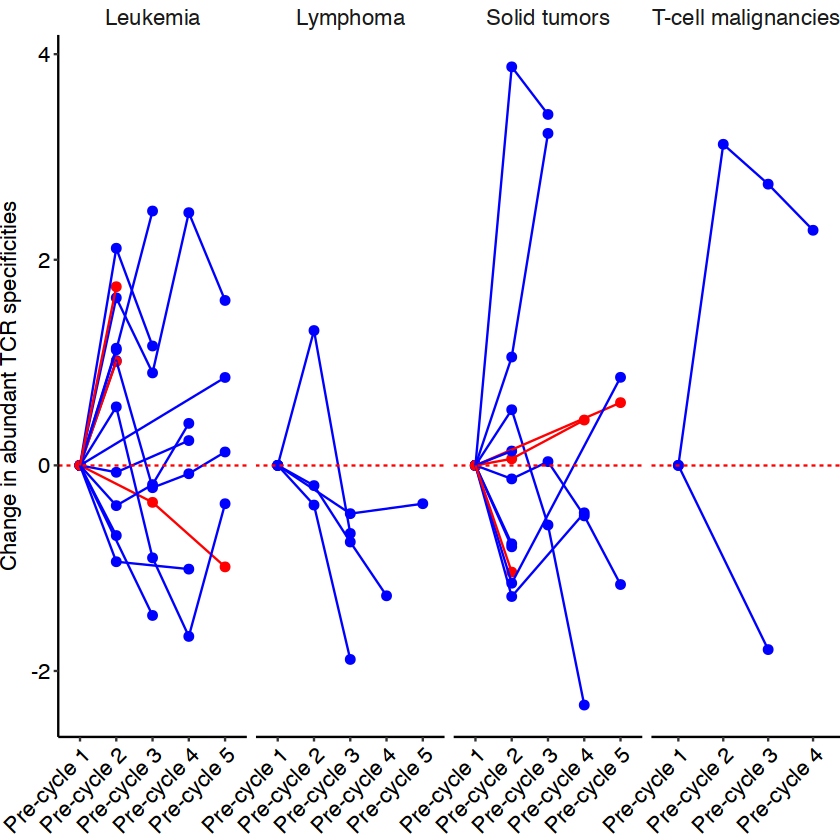

In [38]:
p_simp

In [39]:
pdf(paste0(plotpath, "p_spider_gliphdiv_pbmc.pdf"), width = 8, height = 5)
cowplot::plot_grid(p_simp, labels = "A")
dev.off()

pdf 
  2

# 2 - Fisher scores vs difference

In [9]:
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds( file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

In [10]:
gliph_out <- readr::read_rds(file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [11]:
chp_gliph <- gliph_out[ grepl("CHP", gliph_out$Sample), ]
chp_gliph <- chp_gliph[!grepl("Normal", chp_gliph$subject),]

In [12]:
table(chp_gliph$subject)


          Leukemia           Lymphoma        Solidtumors T-cellmalignancies 
             27523               3604              12801               2331 

In [13]:
chp_gliph_pbmc <- chp_gliph[grepl("PBMC", chp_gliph$Sample),]

In [14]:
chp_gliph_pbmc$Patient <- gsub(".*CHP", "CHP", chp_gliph_pbmc$Sample)
chp_gliph_pbmc$Patient <- gsub("_X.*", "", chp_gliph_pbmc$Patient)

In [15]:
chp_gliph_pbmc$cycle <- gsub(".*X", "X", chp_gliph_pbmc$Sample)
chp_gliph_pbmc$cycle <- gsub("-.*", "", chp_gliph_pbmc$cycle)

In [16]:
head(chp_gliph_pbmc)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,...,type,TcRb,V,J,TcRa,Sample,Freq,subject,Patient,cycle
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGVEQYF,TRBV27,TRBJ2-7,NA,Leukemia:CHP_359_X03-PBMC,24,Leukemia,CHP_359,X03
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQFF,TRBV27,TRBJ2-1,NA,Lymphoma:CHP_371_X01-PBMC,8,Lymphoma,CHP_371,X01
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV28,TRBJ2-7,NA,Leukemia:CHP_360_X05-PBMC,10,Leukemia,CHP_360,X05
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV11-3,TRBJ2-7,NA,Solidtumors:CHP_363_X01-PBMC,41,Solidtumors,CHP_363,X01
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV7-9,TRBJ2-7,NA,Leukemia:CHP_328_X05-PBMC,28,Leukemia,CHP_328,X05
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV7-9,TRBJ2-7,NA,Leukemia:CHP_328_X05-PBMC,1,Leukemia,CHP_328,X05


In [17]:
# get patients with more than one timepoiint and a baseline
mytab <- table(chp_gliph_pbmc$Patient, chp_gliph_pbmc$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]

In [18]:
head(mytab)

         
          X01 X02 X03 X04 X05
  CHP_323   0   0  32   0 131
  CHP_328   0   0   0 434 138
  CHP_331   0   0   0  32 114
  CHP_338   0   0 409 136 293
  CHP_339   0   0  17   0 207
  CHP_340   0   0  79 142 421

In [19]:
df1 <- chp_gliph_pbmc[chp_gliph_pbmc$Patient %in% baseline_patients, ]

In [20]:
# separate pre and post
df1_pre <- df1[ df1$cycle == "X01",]
df1_post <- df1[ df1$cycle != "X01",]

In [21]:
# group by patient and pattern, average frequencyes across samples postchemo
df1_post_mean <- df1_post %>%
  group_by(Patient, pattern) %>%
  summarise(MeanFreq = mean(Freq), .groups = 'drop') %>%
  ungroup()

In [22]:
# group by samples and patterns, avergae the frequencies, if there is > 1 CDR3s in a pattern
df1_pre_mean <- df1_pre %>%
  group_by(Sample, pattern) %>%
  summarise(MeanFreq = mean(Freq), .groups = 'drop') %>%
  ungroup()

In [23]:
head(df1_post_mean)

Patient,pattern,MeanFreq
<chr>,<chr>,<dbl>
CHP_347,%AGTGGQET,26
CHP_347,%AGTSSYE,8
CHP_347,%ATGNTGE,7
CHP_347,%DGSTDT,15
CHP_347,%DSNTGE,3
CHP_347,%EGGSTDT,16


In [24]:
head(df1_pre_mean)

Sample,pattern,MeanFreq
<chr>,<chr>,<dbl>
Leukemia:CHP_347_X01-PBMC,%DSGTGANV,20
Leukemia:CHP_347_X01-PBMC,%GGANTE,14
Leukemia:CHP_347_X01-PBMC,%GNTE,25
Leukemia:CHP_347_X01-PBMC,%GSTDT,9
Leukemia:CHP_347_X01-PBMC,%LADYE,20
Leukemia:CHP_347_X01-PBMC,%PGGG,46


In [25]:
df1_pre_mean$Patient <- gsub(".*CHP", "CHP", df1_pre_mean$Sample)
df1_pre_mean$Patient <- gsub("_X.*", "", df1_pre_mean$Patient)

df1_pre_mean$cycle <- gsub(".*X", "X", df1_pre_mean$Sample)
df1_pre_mean$cycle <- gsub("-.*", "", df1_pre_mean$cycle)

In [26]:
head(df1_pre_mean)

Sample,pattern,MeanFreq,Patient,cycle
<chr>,<chr>,<dbl>,<chr>,<chr>
Leukemia:CHP_347_X01-PBMC,%DSGTGANV,20,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%GGANTE,14,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%GNTE,25,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%GSTDT,9,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%LADYE,20,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%PGGG,46,CHP_347,X01


In [27]:
# matrix gliph x patient
gliph_pat_mat <- matrix(NA,
    nrow = length(unique(df1$pattern)), ncol = length(unique(df1$Patient)),
    dimnames = list(unique(df1$pattern), unique(df1$Patient))
)

In [28]:
head(gliph_pat_mat)

,CHP_363,CHP_381,CHP_366,CHP_347,CHP_369,CHP_399,CHP_405,CHP_350,CHP_353,CHP_396,...,CHP_378,CHP_373,CHP_362,CHP_348,CHP_397,CHP_349,CHP_412,CHP_364,CHP_367,CHP_361
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WVYE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [29]:
for (i in 1:nrow(gliph_pat_mat)) { # pattern loop
    for (j in 1:ncol(gliph_pat_mat)) { # patient loop
        mypattern <- rownames(gliph_pat_mat)[i]
        mypt <- colnames(gliph_pat_mat)[j]
        pt_pre <- df1_pre_mean[df1_pre_mean$Patient == mypt, ]
        pt_post <- df1_post_mean[df1_post_mean$Patient == mypt, ]
        if (length(pt_pre$MeanFreq[pt_pre$pattern == mypattern]) != 0 && length(pt_post$MeanFreq[pt_post$pattern == mypattern]) != 0) { # if pattern is present in both pre and post
            gliph_pat_mat[i, j] <- pt_post$MeanFreq[pt_post$pattern == mypattern] - pt_pre$MeanFreq[pt_pre$pattern == mypattern] # post - pre
        } # end of if
    } # end of patient loop
} # end of pattern loop

In [30]:
gliph_pat_mat <- as.data.frame(gliph_pat_mat)

In [31]:
# Add Fisher score to gliph_pat_mat
gliph_pat_mat$fisher <- df1$Fisher_score[match(rownames(gliph_pat_mat), df1$pattern)]

In [32]:
gliph_pat_mat$gliph <- rownames(gliph_pat_mat)

In [33]:
head(gliph_pat_mat)

,CHP_363,CHP_381,CHP_366,CHP_347,CHP_369,CHP_399,CHP_405,CHP_350,CHP_353,CHP_396,...,CHP_362,CHP_348,CHP_397,CHP_349,CHP_412,CHP_364,CHP_367,CHP_361,fisher,gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,SLG%E
S%GGNTE,NA,-109,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,S%GGNTE
WVYE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,WVYE
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,YDTG
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2.3e-41,S%TGNTE
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,7.5e-41,S%SGANV


In [34]:
# check one sample
df1_pre_mean[df1_pre_mean$Patient == "CHP_381" & df1_pre_mean$pattern == "S%GGNTE",]
df1_post_mean[df1_post_mean$Patient == "CHP_381" & df1_post_mean$pattern == "S%GGNTE",]

temp <- gliph_out[ grepl("CHP_381", gliph_out$Sample), ]
temp[ temp$pattern == "S%GGNTE",]

Sample,pattern,MeanFreq,Patient,cycle
<chr>,<chr>,<dbl>,<chr>,<chr>
Solidtumors:CHP_381_X01-PBMC,S%GGNTE,114,CHP_381,X01


Patient,pattern,MeanFreq
<chr>,<chr>,<dbl>
CHP_381,S%GGNTE,5


index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Sample,Freq,subject
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
2,S%GGNTE,0,6,41,3e-11,1,0.001,0.97,0.001,3e-05,global-S%GGNTE,CASSQGGNTEAFF,TRBV3-1,TRBJ1-1,NA,Solidtumors:CHP_381_X02-PBMC,5,Solidtumors
2,S%GGNTE,0,6,41,3e-11,1,0.001,0.97,0.001,3e-05,global-S%GGNTE,CASSQGGNTEAFF,TRBV14,TRBJ1-1,NA,Solidtumors:CHP_381_X01-PBMC,134,Solidtumors
2,S%GGNTE,0,6,41,3e-11,1,0.001,0.97,0.001,3e-05,global-S%GGNTE,CASSRGGNTEAFF,TRBV28,TRBJ1-1,NA,Solidtumors:CHP_381_X01-PBMC,94,Solidtumors


In [35]:
# long format keep fisher and gliph as columns
gliph_pat_mat_long <- tidyr::pivot_longer(gliph_pat_mat, -c("fisher", "gliph"), names_to = "Patient", values_to = "Delta")

In [36]:
# remove rows with NA
gliph_pat_mat_long <- gliph_pat_mat_long[ !is.na(gliph_pat_mat_long$Delta), ]

In [37]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta
<dbl>,<chr>,<chr>,<dbl>
0.0e+00,S%GGNTE,CHP_381,-109.0
2.3e-41,S%TGNTE,CHP_365,-23.0
1.7e-36,SLQG%E,CHP_378,-2.0
5.2e-25,SLG%NTE,CHP_381,-61.5
5.2e-25,SLG%NTE,CHP_369,-486.0
5.2e-25,S%GGSYNE,CHP_365,48.0


In [38]:
gliphdf_original <- gliphdf # save original gliphdf

In [39]:
# gliphdf[, 2:12][gliphdf[, 2:12] > 0] <- 1 # count each group only once

In [40]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,HTLV1,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,0,50
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,0,41
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0,0,0,82
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0,0,0,97
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0,0,0,98
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0,0,0,95


In [41]:
# Add annotations to gliph_pat_mat_long
gliph_pat_mat_long$CMV <- gliphdf$CMV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$Flu <- gliphdf$Influenza[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HCV <- gliphdf$HCV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$EBV <- gliphdf$EBV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HPV <- gliphdf$HPV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HS <- gliphdf$HomoSapiens[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
# gliph_pat_mat_long$CEF <- gliphdf$CEF[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$TB <- gliphdf$TB[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$SP <- gliphdf$SP[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$MCPyV <- gliphdf$MCPyV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$MDavis <- gliphdf$MDavis[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]

In [42]:
gliph_pat_mat_long$n_unique_cdr3 <- gliphdf$n_unique_cdr3[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]

In [43]:
gliph_pat_mat_long$cancergroup <- meta_div$cancergroup[match(gliph_pat_mat_long$Patient, meta_div$Patient)]
gliph_pat_mat_long$Disease <- meta_div$Disease_type[match(gliph_pat_mat_long$Patient, meta_div$Patient)]
gliph_pat_mat_long$Relapse <- meta_div$Relapse[match(gliph_pat_mat_long$Patient, meta_div$Patient)]

In [44]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
0.0e+00,S%GGNTE,CHP_381,-109.0,0,0,0,0,0,1,0,0,0,40,41,Solid tumors,EWS,0
2.3e-41,S%TGNTE,CHP_365,-23.0,0,0,0,0,0,0,0,0,0,34,34,Leukemia,ALL,0
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,30,32,Leukemia,ALL,0
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,9,22,Solid tumors,EWS,0
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,9,22,Leukemia,AML,0
5.2e-25,S%GGSYNE,CHP_365,48.0,0,0,0,0,0,0,0,0,0,21,22,Leukemia,ALL,0


In [45]:
temp <- gliph_out[ gliph_out$pattern == "S%GGNTE", ]
table(temp$subject)


       HomoSapiens           Leukemia           Lymphoma             MDavis 
                 1                  8                  1                 40 
       Solidtumors T-cellmalignancies 
                 5                  1 

In [46]:
length(unique(gliph_pat_mat_long$Patient))

[1] 30

In [47]:
length(unique(gliph_pat_mat_long$gliph))

[1] 245

In [48]:
summary(gliph_pat_mat_long$Delta)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1263.00   -44.00     5.00    51.56   140.00  1672.50 

In [49]:
quantile(gliph_pat_mat_long$Delta, c(0.1, 0.9))

10%     90% 
-280.80  367.65

In [50]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
0.0e+00,S%GGNTE,CHP_381,-109.0,0,0,0,0,0,1,0,0,0,40,41,Solid tumors,EWS,0
2.3e-41,S%TGNTE,CHP_365,-23.0,0,0,0,0,0,0,0,0,0,34,34,Leukemia,ALL,0
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,30,32,Leukemia,ALL,0
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,9,22,Solid tumors,EWS,0
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,9,22,Leukemia,AML,0
5.2e-25,S%GGSYNE,CHP_365,48.0,0,0,0,0,0,0,0,0,0,21,22,Leukemia,ALL,0


In [51]:
dim(gliph_pat_mat_long[ gliph_pat_mat_long$Delta < 367.6 & gliph_pat_mat_long$Delta > -280.8 & gliph_pat_mat_long$fisher < 0.0001,])

[1] 68 18

In [52]:
gliph_pat_mat_long[ duplicated(gliph_pat_mat_long$gliph),]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
5.2e-25,SLG%NTE,CHP_369,-486,0,0,0,0,0,0,0,0,0,9,22,Leukemia,AML,0
3.9e-18,SL%GE,CHP_410,22,0,0,0,0,0,0,0,0,0,8,23,Leukemia,ALL,0
9.5e-02,S%,CHP_365,125,0,0,0,0,0,0,0,0,0,0,12,Leukemia,ALL,0


In [53]:
# 3 groups common among more than 1 patient
gliph_pat_mat_long[ gliph_pat_mat_long$gliph %in% c("SLG%NTE", "SL%GE", "S%"),]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,9,22,Solid tumors,EWS,0
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,9,22,Leukemia,AML,0
3.9e-18,SL%GE,CHP_381,-1.0,0,0,0,0,0,0,0,0,0,8,23,Solid tumors,EWS,0
3.9e-18,SL%GE,CHP_410,22.0,0,0,0,0,0,0,0,0,0,8,23,Leukemia,ALL,0
9.5e-02,S%,CHP_396,-96.0,0,0,0,0,0,0,0,0,0,0,12,Leukemia,HR ALL,0
9.5e-02,S%,CHP_365,125.0,0,0,0,0,0,0,0,0,0,0,12,Leukemia,ALL,0


In [54]:
gliph_pat_mat_long[ gliph_pat_mat_long$SP != 0,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
6.8e-14,S%GGE,CHP_368,4,0,0,2,0,0,1,0,1,0,6,23,Solid tumors,ARMS,1


In [55]:
# Group antigens into categories
gliph_pat_mat_long$antigen <- NA
for (i in 1:nrow(gliph_pat_mat_long)) {

    if (rowSums(gliph_pat_mat_long[i, c("CMV", "Flu", "HCV", "EBV", "HPV", "MCPyV")]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "Viral"
    }
    if (rowSums(gliph_pat_mat_long[i, "HS"]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "HomoSapiens"
    }
    if (rowSums(gliph_pat_mat_long[i, c("TB", "SP")]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "Bacterial"
    }    
    if (rowSums(gliph_pat_mat_long[i, "HS"]) > 0 && rowSums(gliph_pat_mat_long[i, c("TB", "SP", "CMV", "Flu", "HCV", "EBV", "HPV", "MCPyV")]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "Cross-reactive"
    }
}

In [56]:
gliph_pat_mat_long$antigen[ is.na(gliph_pat_mat_long$antigen)] <- "Unknown"

In [57]:
table(gliph_pat_mat_long$antigen)


Cross-reactive    HomoSapiens        Unknown          Viral 
             2              7            226             13 

In [58]:
226/245

[1] 0.922449

In [59]:
gliph_pat_mat_long$log10fisher <- -log10(gliph_pat_mat_long$fisher)

In [60]:
gliph_pat_mat_long[ gliph_pat_mat_long$Patient == "CHP_368" ,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
6.8e-14,S%GGE,CHP_368,4,0,0,2,0,0,1,0,1,0,6,23,Solid tumors,ARMS,1,Cross-reactive,13.167491
5.7e-06,SL%GET,CHP_368,4,0,0,0,1,0,0,0,0,0,0,7,Solid tumors,ARMS,1,Viral,5.244125
9.1e-06,SLG%GE,CHP_368,7,1,0,0,0,0,0,0,0,0,2,9,Solid tumors,ARMS,1,Viral,5.040959
2.9e-05,SL%YG,CHP_368,13,0,0,0,0,0,0,0,0,0,0,6,Solid tumors,ARMS,1,Unknown,4.537602
1.0e-03,S%GGTANTE,CHP_368,-11,0,0,0,0,0,0,0,0,0,1,3,Solid tumors,ARMS,1,Unknown,3.000000
1.3e-03,SPRRN%E,CHP_368,10,0,0,0,0,0,0,0,0,0,1,2,Solid tumors,ARMS,1,Unknown,2.886057
8.9e-03,SPGTG%YQP,CHP_368,4,0,0,0,0,0,0,0,0,0,0,2,Solid tumors,ARMS,1,Unknown,2.050610
5.4e-02,SGA%YG,CHP_368,-1,0,0,0,0,0,0,0,0,0,0,2,Solid tumors,ARMS,1,Unknown,1.267606


In [61]:
gliph_pat_mat_long[ gliph_pat_mat_long$antigen == "Cross-reactive" ,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
6.8e-14,S%GGE,CHP_368,4,0,0,2,0,0,1,0,1,0,6,23,Solid tumors,ARMS,1,Cross-reactive,13.167491
4.5e-08,SL%GSYE,CHP_357,-35,0,0,1,1,0,1,0,0,0,0,9,Leukemia,AML,0,Cross-reactive,7.346787


In [62]:
gliph_pat_mat_long[ gliph_pat_mat_long$antigen == "Viral" ,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,30,32,Leukemia,ALL,0,Viral,35.769551
5.1e-19,SP%RNTE,CHP_396,1398.5,3,0,0,0,0,0,0,0,0,14,15,Leukemia,HR ALL,0,Viral,18.292430
3.6e-13,S%LNTE,CHP_381,-31.0,0,0,0,1,0,0,0,0,0,9,14,Solid tumors,EWS,0,Viral,12.443697
2.5e-12,SL%GYE,CHP_353,-16.0,0,0,0,0,1,0,0,0,0,8,15,Leukemia,AML,1,Viral,11.602060
9.1e-08,S%TGE,CHP_410,6.0,0,0,1,0,0,0,0,0,0,2,14,Leukemia,ALL,0,Viral,7.040959
1.2e-06,SLAG%YE,CHP_366,340.5,1,0,0,0,0,0,0,0,0,2,8,Lymphoma,HD,0,Viral,5.920819
5.7e-06,SL%GET,CHP_368,4.0,0,0,0,1,0,0,0,0,0,0,7,Solid tumors,ARMS,1,Viral,5.244125
9.1e-06,SLG%GE,CHP_368,7.0,1,0,0,0,0,0,0,0,0,2,9,Solid tumors,ARMS,1,Viral,5.040959
2.1e-05,SPSR%TE,CHP_396,140.0,1,0,0,0,0,0,0,0,0,4,4,Leukemia,HR ALL,0,Viral,4.677781


In [63]:
gliph_pat_mat_long[ gliph_pat_mat_long$fisher < 0.0000001,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
0.0e+00,S%GGNTE,CHP_381,-109.000000,0,0,0,0,0,1,0,0,0,40,41,Solid tumors,EWS,0,HomoSapiens,Inf
2.3e-41,S%TGNTE,CHP_365,-23.000000,0,0,0,0,0,0,0,0,0,34,34,Leukemia,ALL,0,Unknown,40.638272
1.7e-36,SLQG%E,CHP_378,-2.000000,0,0,0,0,1,0,0,0,0,30,32,Leukemia,ALL,0,Viral,35.769551
5.2e-25,SLG%NTE,CHP_381,-61.500000,0,0,0,0,0,0,0,0,0,9,22,Solid tumors,EWS,0,Unknown,24.283997
5.2e-25,SLG%NTE,CHP_369,-486.000000,0,0,0,0,0,0,0,0,0,9,22,Leukemia,AML,0,Unknown,24.283997
5.2e-25,S%GGSYNE,CHP_365,48.000000,0,0,0,0,0,0,0,0,0,21,22,Leukemia,ALL,0,Unknown,24.283997
8.4e-22,S%GTSTDT,CHP_363,5.000000,0,0,0,0,0,0,0,0,0,19,19,Solid tumors,EWS,0,Unknown,21.075721
2.7e-21,RGQG%TE,CHP_365,-507.000000,0,0,0,0,0,0,0,0,0,18,20,Leukemia,ALL,0,Unknown,20.568636
5.1e-19,SP%RNTE,CHP_396,1398.500000,3,0,0,0,0,0,0,0,0,14,15,Leukemia,HR ALL,0,Viral,18.292430


In [64]:
gliph_pat_mat_long[ gliph_pat_mat_long$Delta > 430 & gliph_pat_mat_long$fisher < 0.0001,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,Relapse,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
5.1e-19,SP%RNTE,CHP_396,1398.5,3,0,0,0,0,0,0,0,0,14,15,Leukemia,HR ALL,0,Viral,18.292430
2.7e-08,S%GPNTE,CHP_396,431.0,0,0,0,0,0,0,0,0,0,3,9,Leukemia,HR ALL,0,Unknown,7.568636
4.2e-08,SIG%NTE,CHP_396,853.0,0,0,0,0,0,0,0,0,0,6,7,Leukemia,HR ALL,0,Unknown,7.376751
3.3e-07,SY%GGDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,5,6,Lymphoma,HD,0,Unknown,6.481486
4.7e-07,S%GGSGANV,CHP_404,431.0,0,0,0,0,0,0,0,0,0,3,7,Solid tumors,ERMS,0,Unknown,6.327902
6.0e-07,S%SGGDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,5,7,Lymphoma,HD,0,Unknown,6.221849
2.7e-06,SYSGGD%,CHP_366,527.0,0,0,0,0,0,0,0,0,0,3,4,Lymphoma,HD,0,Unknown,5.568636
7.3e-06,SYSG%DE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,4,5,Lymphoma,HD,0,Unknown,5.136677
2.7e-05,SYS%GDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,4,5,Lymphoma,HD,0,Unknown,4.568636


In [65]:
# gliph_pat_mat_long[ gliph_pat_mat_long$cancergroup == "Lymphoma",]

In [66]:
gliph_pat_mat_long$label <- NA
gliph_pat_mat_long$label[ gliph_pat_mat_long$Delta > 367.6 & gliph_pat_mat_long$fisher < 0.0001] <- "X"
gliph_pat_mat_long$label[ gliph_pat_mat_long$Delta < -280.8 & gliph_pat_mat_long$fisher < 0.0001] <- "X"
gliph_pat_mat_long$label[ gliph_pat_mat_long$Patient == "CHP_413"] <- NA
gliph_pat_mat_long$label[ gliph_pat_mat_long$Patient == "CHP_362"] <- NA
gliph_pat_mat_long$label[ gliph_pat_mat_long$Patient == "CHP_404"] <- NA

In [67]:
tbl <- data.frame( pt = gliph_pat_mat_long$Patient[ which(gliph_pat_mat_long$label == "X") ],
xend = gliph_pat_mat_long$Delta[ which(gliph_pat_mat_long$label == "X") ] - 20, 
yend = gliph_pat_mat_long$log10fisher[ which(gliph_pat_mat_long$label == "X") ] )

In [68]:
tbl$x <- NA
tbl$y <- NA

In [69]:
tbl$x[ tbl$pt == "CHP_369"] <- -1000
tbl$y[ tbl$pt == "CHP_369"] <- 25
tbl$x[ tbl$pt == "CHP_365"] <- -1000
tbl$y[ tbl$pt == "CHP_365"] <- 20
tbl$x[ tbl$pt == "CHP_381"] <- -900
tbl$y[ tbl$pt == "CHP_381"] <- 10
tbl$x[ tbl$pt == "CHP_396"] <- 1200
tbl$y[ tbl$pt == "CHP_396"] <- 10
tbl$x[ tbl$pt == "CHP_366"] <- 500
tbl$y[ tbl$pt == "CHP_366"] <- 12

In [70]:
tbl

pt,xend,yend,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_369,-506.0000,24.283997,-1000,25
CHP_365,-527.0000,20.568636,-1000,20
CHP_396,1378.5000,18.292430,1200,10
CHP_365,-485.0000,15.823909,-1000,20
CHP_365,-527.0000,13.200659,-1000,20
CHP_396,411.0000,7.568636,1200,10
CHP_396,833.0000,7.376751,1200,10
CHP_366,507.0000,6.481486,500,12
CHP_366,507.0000,6.221849,500,12


In [71]:
p4 <- ggplot() +
    geom_point(data = gliph_pat_mat_long, aes(size = n_unique_cdr3, x = Delta, y = -log10(fisher), color = cancergroup, shape = antigen), alpha = 0.6) +
    myplot +
    myaxis +
    geom_hline(yintercept = c(-log10(0.0001), 42), linetype = c(5, 1)) +
    geom_vline(xintercept = c(367.6, -280.9), linetype = 3) +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5), legend.title = element_text(size = 10)) +
    labs(y = "-log10(Fisher score)", x = "TCR specificity group clonal change \n[post-therapy - pre-therapy]") +
    guides(color = guide_legend(title = "Cancer groups"), shape = guide_legend(title = "Antigen"), size = guide_legend(title = "Unique CDR3s (count)")) +
    scale_color_manual(values = group_col)

In [72]:
p4_1 <- p4 + geom_segment( data = tbl, mapping = aes(x = x, y = y, xend = xend, yend = yend), linewidth = 0.5,
         arrow = arrow(length = unit(0.02, "npc"))) + 
         geom_text( data = tbl, mapping = aes(label = pt, x = x, y = y + 1))

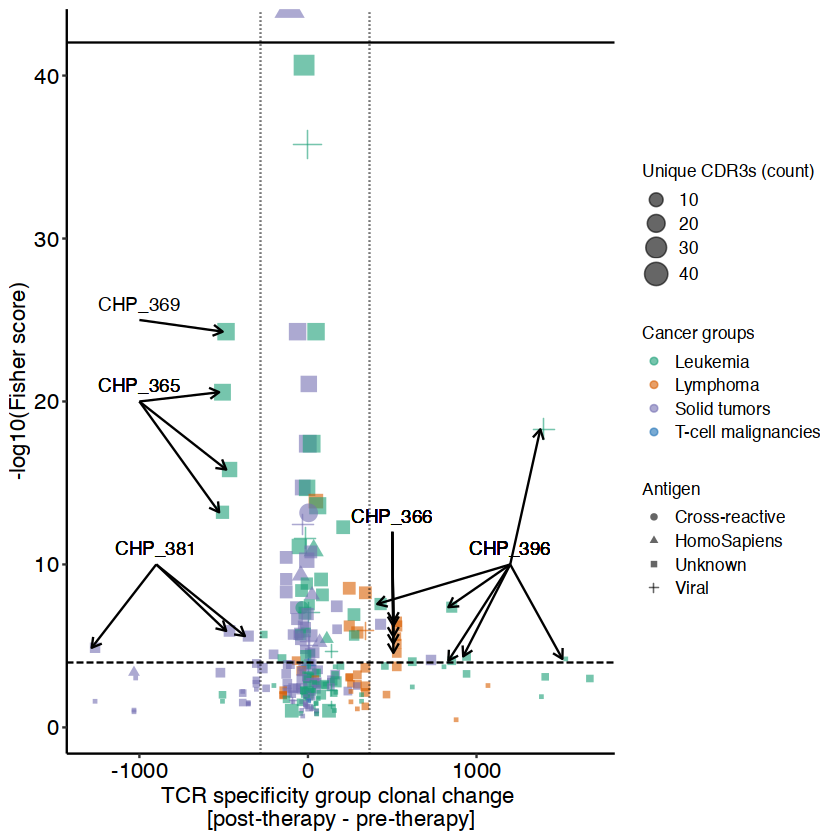

In [73]:
p4_1

In [74]:
pdf(paste0(plotpath, "p_gliph_fisher_delta.pdf"), width = 7, height = 6)
cowplot::plot_grid(p4_1, labels = "C")
dev.off()

pdf 
  2

In [ ]:
hla <- readr::read_rds(paste0(datapath, "/HLA/INT_allHLA_postqc.rds"))

In [ ]:
head(hla[grepl("396", rownames(hla)),30:50])

In [ ]:
gliph_pat_mat_long[ gliph_pat_mat_long$Delta < -280 & gliph_pat_mat_long$fisher < 0.0001,]

In [ ]:
(gliph_out[ gliph_out$pattern == "SLG%GE",])

In [ ]:
head(gliphdf["SP%RNTE",])

# 3- Fisher test of in pre vs post therapy samples containing antigen-specific motifs 

In [107]:
samples_tcr <- readr::read_rds( file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds( file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

PBMC

In [108]:
# bucket all postchemo together
samples_tcr$group <-NA
samples_tcr$group[ samples_tcr$cycle == "X01"] <- "pre"
samples_tcr$group[ samples_tcr$cycle != "X01"] <- "post"

In [109]:
samples_tcr$group <- factor(samples_tcr$group, levels = c("pre", "post"))

In [110]:
colnames(samples_tcr)

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "HTLV1"            
[13] "DENV"              "n_cdr3"            "cdr3_reads"       
[16] "n_gliph"           "n_cdr3ingliph"     "cdr3reads_ingliph"
[19] "cancergroup"       "cycle"             "sampletype"       
[22] "cyclenum"          "Patient"           "Age"              
[25] "group"

In [111]:
mymat <- as.data.frame(matrix(NA, nrow = 0, ncol = 6) )
colnames(mymat) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

In [112]:
for (c in c("Leukemia", "Lymphoma", "Solidtumors")) {
  print(c)
  pbmc <- samples_tcr[samples_tcr$sampletype == "PBMC", ]
  pbmc <- pbmc[pbmc$cancergroup == c, ]

  pbmc <- pbmc[!is.na(pbmc$group), ]

  for (v in c("CMV", "EBV", "HCV", "HPV", "Influenza", "MCPyV", "HomoSapiens", "TB", "SP")) {
    print(v)
    pbmc$motif <- NA
    pbmc$motif[pbmc[[v]] > 0] <- "found"
    pbmc$motif[pbmc[[v]] == 0] <- "notfound"

    contingency_table <- as.data.frame.matrix(table(pbmc$motif, pbmc$group))
    if (nrow(contingency_table) == 1) next
    c1 <- fisher.test(contingency_table)
    mymat_c <- as.data.frame(matrix(NA, nrow = 1, ncol = 6))
    colnames(mymat_c) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

    mymat_c$Antigen[1] <- v
    mymat_c$Cancer[1] <- c
    mymat_c$p[1] <- c1$p.value
    mymat_c$OR[1] <- c1$estimate
    mymat_c$Lower[1] <- c1$conf.int[1]
    mymat_c$Upper[1] <- c1$conf.int[2]
    mymat <- rbind(mymat, mymat_c[1, ])
  } # end of virus loop
} # end of cancer loop


[1] "Leukemia"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"
[1] "Lymphoma"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"
[1] "Solidtumors"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"


In [113]:
pbmc <- samples_tcr[samples_tcr$sampletype == "PBMC", ]
pbmc <- pbmc[pbmc$cancergroup == "Leukemia", ]

pbmc$motif <- NA
pbmc$motif[ pbmc[["MCPyV"]] > 0] <- "found"
pbmc$motif[ pbmc[["MCPyV"]] == 0] <- "notfound"
as.data.frame.matrix(table(pbmc$motif, pbmc$group) ) 

,pre,post
,<int>,<int>
found,9,45
notfound,13,30


In [114]:
mymat$padj <- p.adjust(mymat$p, method = "fdr")

In [115]:
mymat_pbmc <- mymat[order(mymat$padj),]

mymat_pbmc

,Antigen,Cancer,p,OR,Lower,Upper,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CMV,Leukemia,0.11754556,0.4404581,0.14701850,1.329228,0.6894855
3,HCV,Leukemia,0.32083417,0.5659520,0.19307265,1.651136,0.6894855
6,MCPyV,Leukemia,0.14489675,0.4653279,0.15422993,1.346613,0.6894855
7,HomoSapiens,Leukemia,0.36115907,0.5628078,0.16545402,2.095936,0.6894855
8,CMV,Lymphoma,0.32950192,4.4966404,0.37104816,249.960537,0.6894855
9,EBV,Lymphoma,0.32950192,4.4966404,0.37104816,249.960537,0.6894855
12,Influenza,Lymphoma,0.32019704,5.2536659,0.05868729,468.139820,0.6894855
13,MCPyV,Lymphoma,0.07474212,6.8156539,0.58752275,107.845026,0.6894855
14,HomoSapiens,Lymphoma,0.28323018,Inf,0.35538594,Inf,0.6894855


cfDNA

In [116]:
# bucket all postchemo together
samples_tcr$group <-NA
samples_tcr$group[ samples_tcr$cycle == "X01"] <- "pre"
samples_tcr$group[ samples_tcr$cycle != "X01"] <- "post"

In [117]:
samples_tcr$group <- factor(samples_tcr$group, levels = c("pre", "post"))

In [118]:
colnames(samples_tcr)

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "HTLV1"            
[13] "DENV"              "n_cdr3"            "cdr3_reads"       
[16] "n_gliph"           "n_cdr3ingliph"     "cdr3reads_ingliph"
[19] "cancergroup"       "cycle"             "sampletype"       
[22] "cyclenum"          "Patient"           "Age"              
[25] "group"

In [119]:
mymat <- as.data.frame(matrix(NA, nrow = 0, ncol = 6) )
colnames(mymat) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

In [120]:
for (c in c("Leukemia", "Lymphoma", "Solidtumors")) {
  print(c)
  cfdna <- samples_tcr[samples_tcr$sampletype == "cfDNA", ]
  cfdna <- cfdna[cfdna$cancergroup == c, ]
  cfdna <- cfdna[!is.na(cfdna$group), ]

  for (v in c("CMV", "EBV", "HCV", "HPV", "Influenza", "MCPyV", "HomoSapiens", "TB", "SP")) {
    print(v)
    cfdna$motif <- NA
    cfdna$motif[cfdna[[v]] > 0] <- "found"
    cfdna$motif[cfdna[[v]] == 0] <- "notfound"

    contingency_table <- as.data.frame.matrix(table(cfdna$motif, cfdna$group))
    if (nrow(contingency_table) == 1) next
    c1 <- fisher.test(contingency_table)
    mymat_c <- as.data.frame(matrix(NA, nrow = 1, ncol = 6))
    colnames(mymat_c) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

    mymat_c$Antigen[1] <- v
    mymat_c$Cancer[1] <- c
    mymat_c$p[1] <- c1$p.value
    mymat_c$OR[1] <- c1$estimate
    mymat_c$Lower[1] <- c1$conf.int[1]
    mymat_c$Upper[1] <- c1$conf.int[2]
    mymat <- rbind(mymat, mymat_c[1, ])
  } # end of virus loop
} # end of cancer loop


[1] "Leukemia"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"
[1] "Lymphoma"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"
[1] "Solidtumors"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "TB"
[1] "SP"


In [121]:
cfdna <- samples_tcr[samples_tcr$sampletype == "cfDNA", ]
cfdna <- cfdna[cfdna$cancergroup == "Lymphoma", ]

cfdna$motif <- NA
cfdna$motif[ cfdna[["CMV"]] > 0] <- "found"
cfdna$motif[ cfdna[["CMV"]] == 0] <- "notfound"
as.data.frame.matrix(table(cfdna$motif, cfdna$group) ) 

,pre,post
,<int>,<int>
found,4,1
notfound,6,32


In [122]:
mymat$padj <- p.adjust(mymat$p, method = "fdr")

In [123]:
mymat_cfdna <- mymat[order(mymat$padj),]

mymat_cfdna

,Antigen,Cancer,p,OR,Lower,Upper,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,CMV,Lymphoma,0.007461059,19.1618833,1.56799085,1073.279600,0.1492212
5,Influenza,Leukemia,0.211009174,Inf,0.09587506,Inf,0.8772499
7,HomoSapiens,Leukemia,0.214014023,1.8654391,0.64177975,5.323210,0.8772499
15,EBV,Solidtumors,0.219312465,3.3176325,0.25000110,32.689960,0.8772499
18,Influenza,Solidtumors,0.180555556,Inf,0.11637074,Inf,0.8772499
3,HCV,Leukemia,0.322190756,1.8814863,0.45431319,6.843154,0.9445562
17,HPV,Solidtumors,0.330594679,4.6836163,0.05687026,384.405787,0.9445562
6,MCPyV,Leukemia,0.379034998,3.8008738,0.04709639,305.948157,0.9475875
14,CMV,Solidtumors,0.444197958,1.6535729,0.24522685,8.370025,0.9871066


# 4- Fraction of cdr3s with antigen specificity in each sample

In [7]:
samples_tcr_freq <- readr::read_rds( file = paste0(datapath, "GLIPH/int_samples_gliphannot_freq_stat.rds"))
gliphdf_freq <- readr::read_rds(file = paste0(datapath, "GLIPH/gliphannot_freq_stat.rds"))

In [8]:
samples_tcr_freq[ grepl("CHP_415", rownames(samples_tcr_freq)),]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Lymphoma:CHP_415_X01-PBMC,660,29,0,0,478,10793,0,0,0,359,...,19294,123,52,19940,Lymphoma,X01,PBMC,1,CHP_415,17
Lymphoma:CHP_415_X01-cfDNA,44,0,0,0,0,0,0,0,0,0,...,2492,6,3,1180,Lymphoma,X01,cfDNA,1,CHP_415,17
Lymphoma:CHP_415_X02-PBMC,0,0,0,0,304,13164,0,0,0,0,...,21658,83,32,20104,Lymphoma,X02,PBMC,2,CHP_415,17
Lymphoma:CHP_415_X02-cfDNA,0,0,0,0,0,0,0,0,0,0,...,202,1,1,47,Lymphoma,X02,cfDNA,2,CHP_415,17
Lymphoma:CHP_415_X03-PBMC,0,0,0,0,915,2476,489,0,0,0,...,7050,9,4,4963,Lymphoma,X03,PBMC,3,CHP_415,17
Lymphoma:CHP_415_X03-cfDNA,0,0,0,0,0,78,0,0,0,0,...,3069,6,2,393,Lymphoma,X03,cfDNA,3,CHP_415,17


In [9]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,19,0,0,0,0,...,79,13,4,43,Leukemia,X05,PBMC,5,CHP_319,1
Leukemia:CHP_323_X03-PBMC,142,0,64,0,0,1657,0,0,0,64,...,3175,32,15,2449,Leukemia,X03,PBMC,3,CHP_323,1
Leukemia:CHP_323_X03-cfDNA,1685,0,0,0,3591,36754,0,0,0,0,...,81588,86,39,70456,Leukemia,X03,cfDNA,3,CHP_323,1
Leukemia:CHP_323_X05-PBMC,22,0,0,0,28,713,0,0,0,24,...,2020,127,55,1407,Leukemia,X05,PBMC,5,CHP_323,1
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,2589,0,0,0,0,...,4938,12,7,4488,Leukemia,X05,cfDNA,5,CHP_323,1
Leukemia:CHP_326_X05-cfDNA,0,0,2265,0,0,9998,0,0,0,0,...,18584,14,6,14308,Leukemia,X05,cfDNA,5,CHP_326,4


In [10]:
# bucket all postchemo together
samples_tcr_freq$group <-NA
samples_tcr_freq$group[ samples_tcr_freq$cycle == "X01"] <- "pre"
samples_tcr_freq$group[ samples_tcr_freq$cycle != "X01"] <- "post"
samples_tcr_freq$group <- factor(samples_tcr_freq$group, levels = c("pre", "post"))

In [11]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,19,0,0,0,0,...,13,4,43,Leukemia,X05,PBMC,5,CHP_319,1,post
Leukemia:CHP_323_X03-PBMC,142,0,64,0,0,1657,0,0,0,64,...,32,15,2449,Leukemia,X03,PBMC,3,CHP_323,1,post
Leukemia:CHP_323_X03-cfDNA,1685,0,0,0,3591,36754,0,0,0,0,...,86,39,70456,Leukemia,X03,cfDNA,3,CHP_323,1,post
Leukemia:CHP_323_X05-PBMC,22,0,0,0,28,713,0,0,0,24,...,127,55,1407,Leukemia,X05,PBMC,5,CHP_323,1,post
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,2589,0,0,0,0,...,12,7,4488,Leukemia,X05,cfDNA,5,CHP_323,1,post
Leukemia:CHP_326_X05-cfDNA,0,0,2265,0,0,9998,0,0,0,0,...,14,6,14308,Leukemia,X05,cfDNA,5,CHP_326,4,post


In [12]:
samples_tcr_freq$sample_id <- paste0(samples_tcr_freq$Patient, "_", samples_tcr_freq$cycle)
samples_tcr_freq$sample_id <- gsub("X", "", samples_tcr_freq$sample_id) 

In [16]:
samples_tcr_freq$Relapse <- meta_div$Relapse[ match(samples_tcr_freq$sample_id, meta_div$sample_id) ]

### PBMC

Leukemia

In [17]:
sampletype <- "PBMC"
cancergroup <- "Leukemia"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [18]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [19]:
myantigens <- colnames(df1_baseline)[1:13]
myantigens

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
 [6] "MDavis"      "HPV"         "CEF"         "TB"          "MCPyV"      
[11] "SP"          "HTLV1"       "DENV"

In [20]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [21]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [22]:
  # generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0,]

  for( i in unique(df1_baseline$Patient)){  
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_pre <- nrow(mypt[ mypt$cycle == "X01", ])
    mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    df1_baseline_id <- rbind(df1_baseline_id, mypt)
  }

In [23]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Leukemia:CHP_347_X01-PBMC,0,0,46,74,63,2824,0,0,0,0,...,0.010725230,0.4807627,0.000000000,0,0,0.0000000,0,0,0,CHP_347_1
Leukemia:CHP_347_X02-PBMC,7,61,13,0,152,2532,0,0,0,0,...,0.025409562,0.4232698,0.000000000,0,0,0.0000000,0,0,0,CHP_347_1
Leukemia:CHP_347_X03-PBMC,0,23,42,0,19,508,8,0,0,0,...,0.014525994,0.3883792,0.006116208,0,0,0.0000000,0,0,0,CHP_347_2
Leukemia:CHP_347_X04-PBMC,22,0,6,5,23,388,0,0,0,102,...,0.028395062,0.4790123,0.000000000,0,0,0.1259259,0,0,0,CHP_347_3
Leukemia:CHP_347_X05-PBMC,0,0,0,0,4,263,13,0,0,0,...,0.003565062,0.2344029,0.011586453,0,0,0.0000000,0,0,0,CHP_347_4
Leukemia:CHP_347_X01-PBMC1,0,0,46,74,63,2824,0,0,0,0,...,0.010725230,0.4807627,0.000000000,0,0,0.0000000,0,0,0,CHP_347_2


In [24]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','TB','MCPyV','SP')

In [25]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [26]:
message("CMV")
tapply(df1_baseline_id$CMV_frac, df1_baseline_id$group, summary)
message("Human")
tapply(df1_baseline_id$HomoSapiens_frac, df1_baseline_id$group, summary)
message("MCPyV")
tapply(df1_baseline_id$MCPyV_frac, df1_baseline_id$group, summary)
message("HCV")
tapply(df1_baseline_id$HCV_frac, df1_baseline_id$group, summary)

CMV



$pre
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0007305 0.0026864 0.0030783 0.0167638 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.003157 0.007161 0.012063 0.032232 


Human



$pre
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.001458 0.010725 0.011816 0.017608 0.066471 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.009229 0.018415 0.017410 0.025382 0.039832 


MCPyV



$pre
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002071 0.003870 0.010204 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.001994 0.008603 0.007240 0.125926 


HCV



$pre
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002411 0.007312 0.008080 0.009184 0.030363 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.002173 0.005692 0.006878 0.049491 


In [27]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[

In [28]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [29]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
CMV,CMV,0.01473965,0.05158879
HomoSapiens,HomoSapiens,0.01072487,0.05158879
MCPyV,MCPyV,0.03702766,0.08639786
HCV,HCV,0.05611709,0.09820491
EBV,EBV,0.41627588,0.50403587
Influenza,Influenza,0.50403587,0.50403587
HPV,HPV,0.43786377,0.50403587
TB,TB,NaN,NaN
SP,SP,NaN,NaN


In [30]:
sig_wilcox_mat <- wilcox_mat[ which(wilcox_mat$adjp < 0.1),]
sig_wilcox_mat$p.val <- sapply(sig_wilcox_mat$p, function(x) round_and_format(x) )

In [31]:
sig_wilcox_mat

,antigen,p,adjp,p.val
,<chr>,<dbl>,<dbl>,<chr>
CMV,CMV,0.01473965,0.05158879,0.01
HCV,HCV,0.05611709,0.09820491,0.06
HomoSapiens,HomoSapiens,0.01072487,0.05158879,0.01
MCPyV,MCPyV,0.03702766,0.08639786,0.04


In [32]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [33]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [34]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [35]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, 
levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [36]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,CMV,0.00000000
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,EBV,0.00000000
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HCV,0.00783112
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,Influenza,0.01259789
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HomoSapiens,0.01072523
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HPV,0.00000000


In [37]:
sig_wilcox_mat

,antigen,p,adjp,p.val
,<chr>,<dbl>,<dbl>,<chr>
CMV,CMV,0.01473965,0.05158879,0.01
HCV,HCV,0.05611709,0.09820491,0.06
HomoSapiens,HomoSapiens,0.01072487,0.05158879,0.01
MCPyV,MCPyV,0.03702766,0.08639786,0.04


In [38]:
levels(df1_baseline_long$antigen)

[1] "HomoSapiens" "CMV"         "EBV"         "HCV"         "HPV"        
[6] "MCPyV"       "Influenza"

In [39]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,CMV,0.00000000
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,EBV,0.00000000
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HCV,0.00783112
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,Influenza,0.01259789
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HomoSapiens,0.01072523
CHP_347_01,CHP_347,X01,Leukemia,13,0,pre,CHP_347_1,HPV,0.00000000


In [40]:
df1_baseline_long$label <- NA
df1_baseline_long$label[ df1_baseline_long$fraction > 0.05] <- "X"

In [41]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~ factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    ggsignif::geom_signif(
        data = sig_wilcox_mat,
        aes(xmin = 1, xmax = 2, annotations = p.val, y_position = 0.14),
        textsize = 3, vjust = -0.2, color = "black",
        manual = TRUE
    ) +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    geom_text_repel(
        label = ifelse(df1_baseline_long$label == "X", as.character(df1_baseline_long$Patient), ""),
        size = 4, #min.segment.length = 0,
        ylim = c(-Inf, Inf),
        nudge_y = .006,
        arrow = arrow(length = unit(0.1, "npc"))
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )

Warning message in ggsignif::geom_signif(data = sig_wilcox_mat, aes(xmin = 1, xmax = 2, :
"Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position"


Warning message:
"Removed 432 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


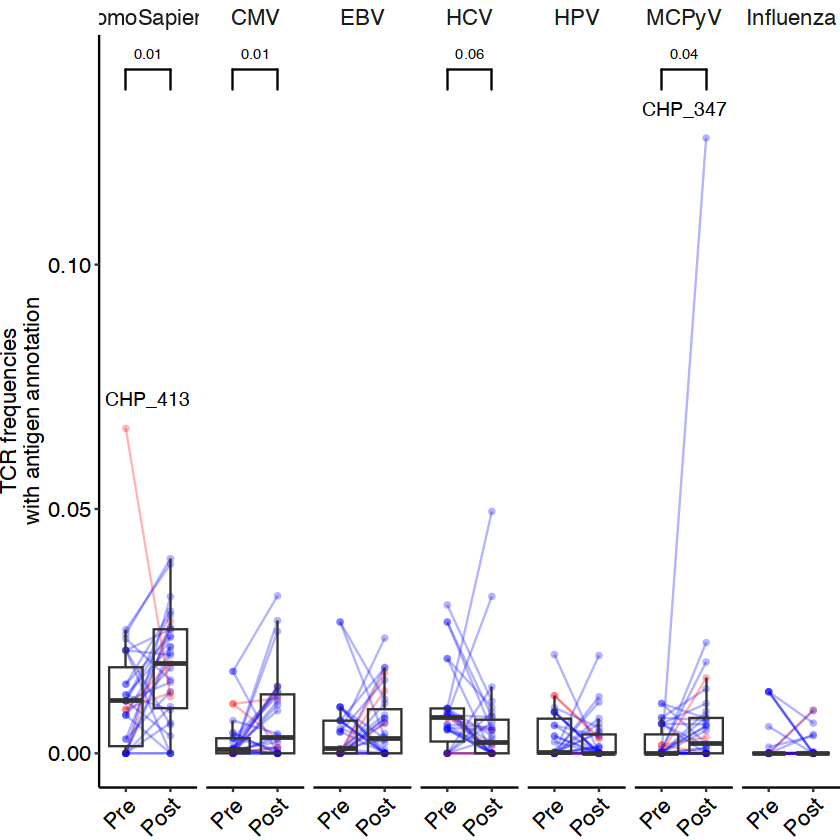

In [42]:
p_sample_cancer

In [43]:
pdf(paste0(plotpath, "antigen_frac_p_leu.pdf"), width = 10, height = 5)
cowplot::plot_grid(p_sample_cancer, labels = "B")
dev.off()


Warning message:
"Removed 432 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


pdf 
  2

Lymphoma

In [44]:
sampletype <- "PBMC"
cancergroup <- "Lymphoma"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [45]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [46]:
myantigens <- colnames(df1_baseline)[1:13]

In [47]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [48]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [49]:
df1_baseline[ grepl("CHP_366", rownames(df1_baseline)),]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,Influenza_frac,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lymphoma:CHP_366_X01-PBMC,129,41,45,0,95,2569,0,0,0,20,...,0,0.024856096,0.6721612,0,0,0,0.005232862,0,0,0
Lymphoma:CHP_366_X03-PBMC,1393,519,25,0,1307,21558,0,0,0,0,...,0,0.022855644,0.3769870,0,0,0,0.000000000,0,0,0
Lymphoma:CHP_366_X05-PBMC,12904,0,0,0,213,36739,0,0,0,0,...,0,0.002450388,0.4226517,0,0,0,0.000000000,0,0,0
Lymphoma:CHP_366_X01-PBMC1,129,41,45,0,95,2569,0,0,0,20,...,0,0.024856096,0.6721612,0,0,0,0.005232862,0,0,0


In [50]:
  # generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0,]

  for( i in unique(df1_baseline$Patient)){  
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_pre <- nrow(mypt[ mypt$cycle == "X01", ])
    mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    df1_baseline_id <- rbind(df1_baseline_id, mypt)
  }

In [51]:
message("CMV")
tapply(df1_baseline_id$CMV_frac, df1_baseline_id$group, summary)
message("Human")
tapply(df1_baseline_id$HomoSapiens_frac, df1_baseline_id$group, summary)


CMV



$pre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.03375 0.03421 0.03121 0.04832 0.04832 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.020371 0.007945 0.148450 


Human



$pre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01807 0.01807 0.02477 0.02393 0.02486 0.03095 

$post
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.005173 0.021098 0.015583 0.129787 


In [52]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Lymphoma:CHP_361_X01-PBMC,131,63,0,0,49,1633,0,0,0,0,...,0.018074511,0.6023608,0.00000000,0,0,0,0,0,0,CHP_361_1
Lymphoma:CHP_361_X02-PBMC,5,127,0,0,10,732,28,0,0,0,...,0.005173306,0.3786860,0.01448526,0,0,0,0,0,0,CHP_361_1
Lymphoma:CHP_361_X03-PBMC,0,12,0,0,0,518,0,0,0,0,...,0.000000000,0.2445703,0.00000000,0,0,0,0,0,0,CHP_361_2
Lymphoma:CHP_361_X04-PBMC,0,9,0,0,0,66,0,0,0,0,...,0.000000000,0.2857143,0.00000000,0,0,0,0,0,0,CHP_361_3
Lymphoma:CHP_361_X01-PBMC1,131,63,0,0,49,1633,0,0,0,0,...,0.018074511,0.6023608,0.00000000,0,0,0,0,0,0,CHP_361_2
Lymphoma:CHP_361_X01-PBMC.1,131,63,0,0,49,1633,0,0,0,0,...,0.018074511,0.6023608,0.00000000,0,0,0,0,0,0,CHP_361_3


In [53]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','MCPyV')

In [54]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [55]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DAT

In [56]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [57]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
CMV,CMV,0.2328043,0.4656087
HomoSapiens,HomoSapiens,0.1232049,0.4656087
HPV,HPV,0.1814492,0.4656087
MCPyV,MCPyV,0.5270893,0.7906339
EBV,EBV,0.9441141,1.0000000
HCV,HCV,1.0000000,1.0000000
Influenza,Influenza,NaN,NaN


In [58]:
# sig_wilcox_mat <- wilcox_mat[ wilcox_mat$adjp < 0.15,]
# sig_wilcox_mat$p.val <- sapply(sig_wilcox_mat$adjp, function(x) round_and_format(x) )

In [59]:
# sig_wilcox_mat

In [60]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac,
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [61]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [62]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [63]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [64]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,CMV,0.04832165
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,EBV,0.02323866
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,HCV,0.00000000
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,Influenza,0.00000000
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,HomoSapiens,0.01807451
CHP_361_01,CHP_361,X01,Lymphoma,13,0,pre,CHP_361_1,HPV,0.00000000


In [65]:
df1_baseline_long$label <- NA
df1_baseline_long$label[ df1_baseline_long$fraction > 0.1] <- "X"

In [66]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~ factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    geom_text_repel(
        label = ifelse(df1_baseline_long$label == "X", as.character(df1_baseline_long$Patient), ""),
        size = 4, #min.segment.length = 0,
        nudge_y = .006,
        ylim = c(-Inf, Inf),
        arrow = arrow(length = unit(0.1, "npc"))
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )


Warning message:
"Removed 124 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


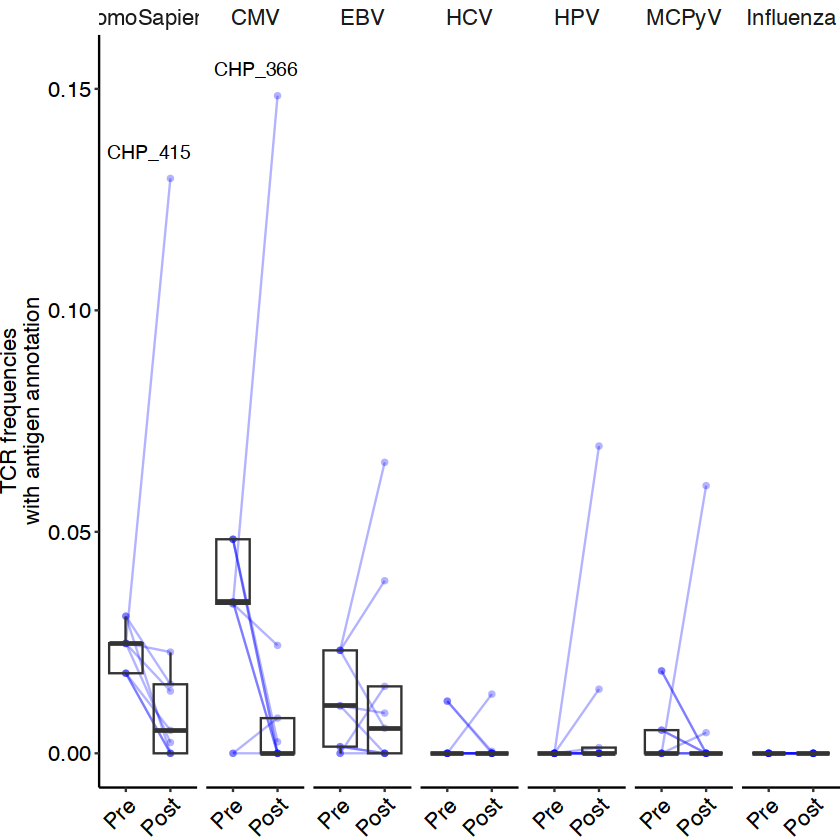

In [67]:
p_sample_cancer

In [68]:
pdf(paste0(plotpath, "antigen_frac_p_lym.pdf"), width = 10, height = 5)
cowplot::plot_grid(p_sample_cancer, labels = "B")
dev.off()

Warning message:
"Removed 124 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


pdf 
  2

Solid

In [69]:
sampletype <- "PBMC"
cancergroup <- "Solidtumors"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [70]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [71]:
myantigens <- colnames(df1_baseline)[1:13]

In [72]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [73]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [74]:
  # generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0,]

  for( i in unique(df1_baseline$Patient)){  
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_pre <- nrow(mypt[ mypt$cycle == "X01", ])
    mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    df1_baseline_id <- rbind(df1_baseline_id, mypt)
  }

In [75]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Solidtumors:CHP_348_X01-PBMC,12,3,3,0,68,501,1,0,0,0,...,0.07142857,0.5262605,0.001050420,0,0,0.000000000,0,0,0,CHP_348_1
Solidtumors:CHP_348_X02-PBMC,0,0,0,0,0,121,0,0,0,0,...,0.00000000,0.4060403,0.000000000,0,0,0.000000000,0,0,0,CHP_348_1
Solidtumors:CHP_350_X01-PBMC,27,0,10,5,52,818,2,0,0,7,...,0.03157256,0.4966606,0.001214329,0,0,0.004250152,0,0,0,CHP_350_1
Solidtumors:CHP_350_X02-PBMC,16,29,47,0,101,1672,0,0,0,22,...,0.03375668,0.5588235,0.000000000,0,0,0.007352941,0,0,0,CHP_350_1
Solidtumors:CHP_350_X03-PBMC,20,12,6,0,35,1120,0,0,0,28,...,0.01640112,0.5248360,0.000000000,0,0,0.013120900,0,0,0,CHP_350_2
Solidtumors:CHP_350_X04-PBMC,6,9,4,0,18,769,0,0,0,0,...,0.01820020,0.7775531,0.000000000,0,0,0.000000000,0,0,0,CHP_350_3


In [76]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','MCPyV')

In [77]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [78]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1

In [79]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [80]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
CMV,CMV,0.05736952,0.1338622
Influenza,Influenza,0.04199965,0.1338622
MCPyV,MCPyV,0.03624171,0.1338622
HCV,HCV,0.32017407,0.4287334
HomoSapiens,HomoSapiens,0.35308667,0.4287334
HPV,HPV,0.36748581,0.4287334
EBV,EBV,0.92238568,0.9223857


In [81]:
sig_wilcox_mat <- wilcox_mat[ which(wilcox_mat$adjp < 0.1),]
sig_wilcox_mat$p.val <- sapply(sig_wilcox_mat$p, function(x) round_and_format(x) )

In [82]:
# sig_wilcox_mat

In [83]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [84]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [85]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [86]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [87]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,CMV,0.012605042
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,EBV,0.003151261
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,HCV,0.003151261
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,Influenza,0.000000000
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,HomoSapiens,0.071428571
CHP_348_01,CHP_348,X01,Solidtumors,18,0,pre,CHP_348_1,HPV,0.001050420


In [88]:
df1_baseline_long$label <- NA
df1_baseline_long$label[df1_baseline_long$fraction > 0.04 &
    df1_baseline_long$antigen == "EBV"] <- "X"
df1_baseline_long$label[df1_baseline_long$fraction > 0.15] <- "X"


In [89]:
df1_baseline_long[ df1_baseline_long$Patient == "CHP_414",]

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction,label
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>,<chr>
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,CMV,0.0000000000,NA
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,EBV,0.0000000000,NA
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,HCV,0.0000000000,NA
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,Influenza,0.0000000000,NA
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,HomoSapiens,0.0000000000,NA
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,HPV,0.2018166997,X
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,MCPyV,0.0000000000,NA
CHP_414_02,CHP_414,X02,Solidtumors,1,0,post,CHP_414_1,CMV,0.0068557183,NA
CHP_414_02,CHP_414,X02,Solidtumors,1,0,post,CHP_414_1,EBV,0.0058169731,NA


In [90]:
df1_baseline_long[ which(df1_baseline_long$label == "X"),]

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction,label
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>,<chr>
CHP_363_03,CHP_363,X03,Solidtumors,20,0,post,CHP_363_2,HomoSapiens,0.23684211,X
CHP_364_04,CHP_364,X04,Solidtumors,16,1,post,CHP_364_2,EBV,0.04251208,X
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_1,HPV,0.20181670,X
CHP_414_01,CHP_414,X01,Solidtumors,1,0,pre,CHP_414_2,HPV,0.20181670,X
CHP_418_02,CHP_418,X02,Solidtumors,2,1,post,CHP_418_1,EBV,0.05178535,X


In [91]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    # ggsignif::geom_signif(
    #     data = sig_wilcox_mat,
    #     aes(xmin = 1, xmax = 2, annotations = p.val, y_position = 0.07),
    #     textsize = 3, vjust = -0.2, color = "black",
    #     manual = TRUE
    # ) +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
        geom_text_repel(
        label = ifelse(df1_baseline_long$label == "X", as.character(df1_baseline_long$Patient), ""),
        size = 4, #min.segment.length = 0,
        nudge_y = .006,
        ylim = c(-Inf, Inf)
        #arrow = arrow(length = unit(0.1, "npc"))
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )


Warning message:
"Removed 331 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


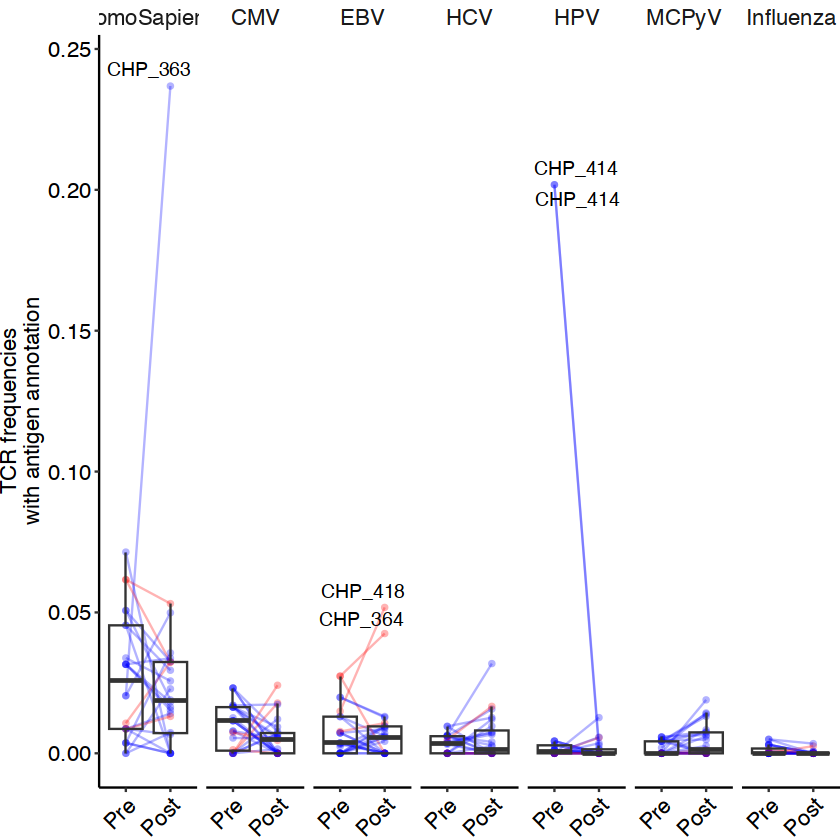

In [92]:
p_sample_cancer

In [93]:
pdf(paste0(plotpath, "antigen_frac_p_solid.pdf"), width = 10, height = 5)
cowplot::plot_grid(p_sample_cancer, labels = "C")
dev.off()

Warning message:
"Removed 331 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


pdf 
  2

# Lookup

In [ ]:
head(meta_div[ meta_div$Patient == "CHP_364",])

In [ ]:
gliph_out <- readr::read_rds(file = paste0(datapath, "GLIPH/int_gliph_v5_cleaned.rds"))

In [ ]:
head(gliph_out)

In [ ]:
mysample <- gliph_out[ grepl("CHP_363_X02", gliph_out$Sample),]

In [ ]:
tmp <- gliph_out[gliph_out$pattern %in% mysample$pattern, ] # subset to include patterns in my sample
antigen_gliphs <- tmp[grepl("Homo", tmp$subject),] # get antigen gliphs
mysample[mysample$pattern %in% antigen_gliphs$pattern,]


In [ ]:
antigen_gliphs$Sample[ antigen_gliphs$pattern %in% mysample$pattern]

In [ ]:
antigen_gliphs

In [ ]:
mysample[ mysample$pattern == "V%TE",]

In [ ]:
gliph_out[ gliph_out$pattern %in% chp413$pattern,]

### cfDNA

Leukemia

In [208]:
sampletype <- "cfDNA"
cancergroup <- "Leukemia"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [209]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [210]:
myantigens <- colnames(df1_baseline)[1:13]

In [211]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [212]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [213]:
# generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0, ]

for (i in unique(df1_baseline$Patient)) {
  mypt <- df1_baseline[df1_baseline$Patient == i, ]
  n_pre <- nrow(mypt[mypt$cycle == "X01", ])
  mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
  mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
  df1_baseline_id <- rbind(df1_baseline_id, mypt)
}


In [214]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Leukemia:CHP_345_X01-cfDNA,385,1511,0,490,258,16874,0,0,0,224,...,0.01325865,0.8671566,0,0,0,0.01151138,0,0,0,CHP_345_1
Leukemia:CHP_345_X02-cfDNA,0,0,0,0,0,535,0,0,0,0,...,0.00000000,0.2123859,0,0,0,0.00000000,0,0,0,CHP_345_1
Leukemia:CHP_345_X04-cfDNA,0,0,0,0,0,13893,0,0,0,0,...,0.00000000,0.3926906,0,0,0,0.00000000,0,0,0,CHP_345_2
Leukemia:CHP_345_X01-cfDNA1,385,1511,0,490,258,16874,0,0,0,224,...,0.01325865,0.8671566,0,0,0,0.01151138,0,0,0,CHP_345_2
Leukemia:CHP_353_X01-cfDNA,0,0,0,0,0,11,0,0,0,0,...,0.00000000,0.1100000,0,0,0,0.00000000,0,0,0,CHP_353_1
Leukemia:CHP_353_X02-cfDNA,208,0,0,0,0,3782,0,0,0,0,...,0.00000000,0.3676128,0,0,0,0.00000000,0,0,0,CHP_353_1


In [215]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','MCPyV')

In [216]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [217]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[

In [218]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [219]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
Influenza,Influenza,0.3457786,0.6051125
HomoSapiens,HomoSapiens,0.1154794,0.6051125
HPV,HPV,0.1967056,0.6051125
MCPyV,MCPyV,0.3457786,0.6051125
CMV,CMV,0.7259636,0.8334840
EBV,EBV,0.8334840,0.8334840
HCV,HCV,0.6085999,0.8334840


In [220]:
# sig_wilcox_mat <- wilcox_mat[ wilcox_mat$adjp < 0.15,]
# sig_wilcox_mat$p.val <- sapply(sig_wilcox_mat$adjp, function(x) round_and_format(x) )

In [221]:
# sig_wilcox_mat

In [222]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [223]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [224]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [225]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [226]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,CMV,0.01978519
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,EBV,0.07765044
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,HCV,0.00000000
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,Influenza,0.02518115
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,HomoSapiens,0.01325865
CHP_345_01,CHP_345,X01,Leukemia,1,0,pre,CHP_345_1,HPV,0.00000000


In [227]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )


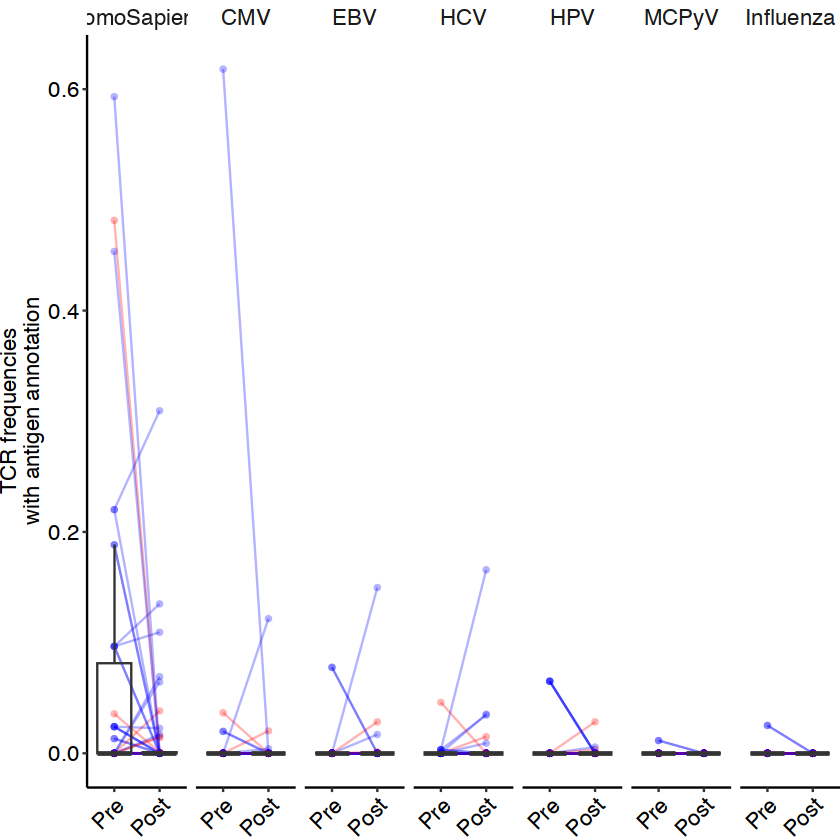

In [228]:
p_sample_cancer

In [229]:
pdf(paste0(plotpath, "antigen_frac_p_leu_cfDNA.pdf"), width = 10, height = 5)
p_sample_cancer
dev.off()

pdf 
  2

Lymphoma

In [230]:
sampletype <- "cfDNA"
cancergroup <- "Lymphoma"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [231]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [232]:
myantigens <- colnames(df1_baseline)[1:13]

In [233]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [234]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [235]:
  # generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0,]

  for( i in unique(df1_baseline$Patient)){  
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_pre <- nrow(mypt[ mypt$cycle == "X01", ])
    mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
    df1_baseline_id <- rbind(df1_baseline_id, mypt)
  }

In [236]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Lymphoma:CHP_344_X01-cfDNA,0,0,0,0,0,335,0,0,0,0,...,0.0000000000,1.80107527,0,0,0,0,0,0,0,CHP_344_1
Lymphoma:CHP_344_X02-cfDNA,0,0,0,0,1,22,0,0,0,0,...,0.0009398496,0.02067669,0,0,0,0,0,0,0,CHP_344_1
Lymphoma:CHP_344_X03-cfDNA,0,0,0,0,0,7610,0,0,0,0,...,0.0000000000,0.91061386,0,0,0,0,0,0,0,CHP_344_2
Lymphoma:CHP_344_X04-cfDNA,0,0,0,0,0,6,0,0,0,0,...,0.0000000000,0.66666667,0,0,0,0,0,0,0,CHP_344_3
Lymphoma:CHP_344_X05-cfDNA,0,0,0,0,0,0,0,0,0,0,...,0.0000000000,0.00000000,0,0,0,0,0,0,0,CHP_344_4
Lymphoma:CHP_344_X01-cfDNA1,0,0,0,0,0,335,0,0,0,0,...,0.0000000000,1.80107527,0,0,0,0,0,0,0,CHP_344_2


In [237]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','MCPyV')

In [238]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [239]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = D

In [240]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [241]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
CMV,CMV,0.02177671,0.08710683
Influenza,Influenza,1.00000000,1.00000000
HomoSapiens,HomoSapiens,0.83348400,1.00000000
HPV,HPV,1.00000000,1.00000000
EBV,EBV,NaN,NaN
HCV,HCV,NaN,NaN
MCPyV,MCPyV,NaN,NaN


In [242]:
sig_wilcox_mat <- wilcox_mat[ which(wilcox_mat$adjp < 0.1),]
sig_wilcox_mat$p.val <- sapply(sig_wilcox_mat$p, function(x) round_and_format(x) )

In [243]:
sig_wilcox_mat

,antigen,p,adjp,p.val
,<chr>,<dbl>,<dbl>,<chr>
CMV,CMV,0.02177671,0.08710683,0.02


In [244]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [245]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [246]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [247]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [248]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,CMV,0
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,EBV,0
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,HCV,0
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,Influenza,0
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,HomoSapiens,0
CHP_344_01,CHP_344,X01,Lymphoma,6,0,pre,CHP_344_1,HPV,0


In [249]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    ggsignif::geom_signif(
        data = sig_wilcox_mat,
        aes(xmin = 1, xmax = 2, annotations = p.val, y_position = 0.07),
        textsize = 3, vjust = -0.2, color = "black",
        manual = TRUE
    ) +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )


Warning message in ggsignif::geom_signif(data = sig_wilcox_mat, aes(xmin = 1, xmax = 2, :
"Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position"


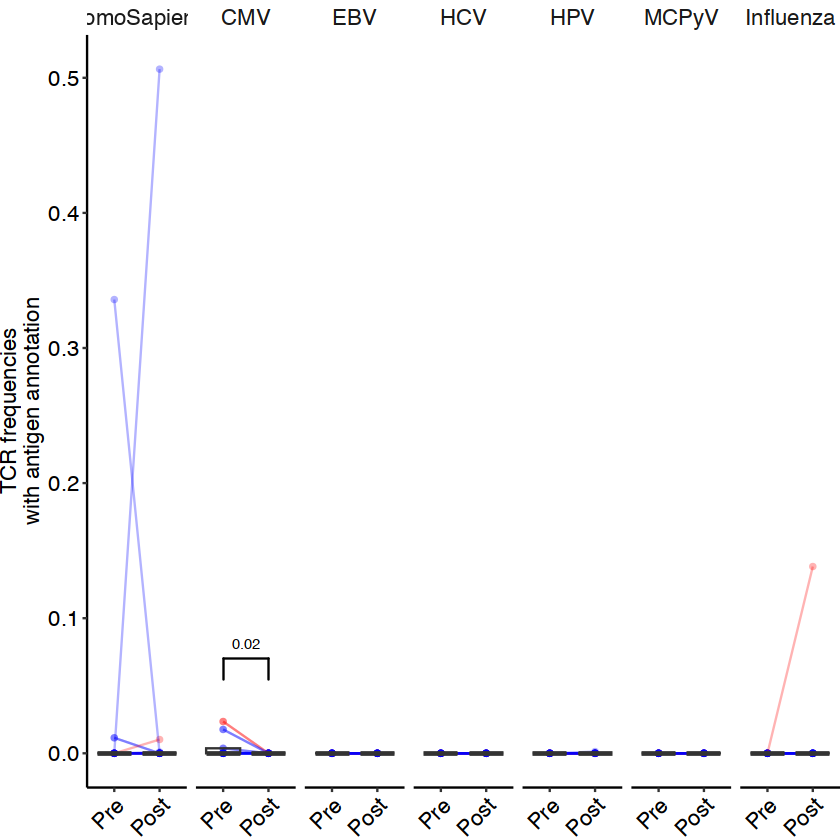

In [250]:
p_sample_cancer

In [251]:
pdf(paste0(plotpath, "antigen_frac_p_lym_cfDNA.pdf"), width = 10, height = 5)
p_sample_cancer
dev.off()

pdf 
  2

Solid

In [252]:
sampletype <- "cfDNA"
cancergroup <- "Solidtumors"

df1 <- samples_tcr_freq[ samples_tcr_freq$sampletype == sampletype,]
df1 <- df1[ df1$cancergroup == cancergroup,]

In [253]:
# get patients with more than one timepoiint and a baseline
mytab <- table(df1$Patient, df1$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]
df1_baseline <- df1[df1$Patient %in% baseline_patients, ]

In [254]:
myantigens <- colnames(df1_baseline)[1:13]

In [255]:
# generate pre samples for each additional post sample
for( i in unique(df1_baseline$Patient)){
    mypt <- df1_baseline[ df1_baseline$Patient == i, ]
    n_post <- nrow(mypt[ mypt$cycle != "X01", ])
    df1_baseline <- rbind(df1_baseline, mypt[ mypt$cycle == "X01", ][rep(1, n_post-1), ])
}

In [256]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    df1_baseline[[myvar]] <- NA
    df1_baseline[[myvar]] <- df1_baseline[,i] / df1_baseline$cdr3_reads
}

In [257]:
# generate an a unique ID between each pairs of pre and post
df1_baseline$ID <- NA
df1_baseline_id <- df1_baseline[0, ]

for (i in unique(df1_baseline$Patient)) {
  mypt <- df1_baseline[df1_baseline$Patient == i, ]
  n_pre <- nrow(mypt[mypt$cycle == "X01", ])
  mypt$ID[mypt$group == "pre"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
  mypt$ID[mypt$group == "post"] <- paste0(mypt$Patient[mypt$group == "pre"], "_", rep(1:n_pre))
  df1_baseline_id <- rbind(df1_baseline_id, mypt)
}


In [258]:
head(df1_baseline_id)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,HomoSapiens_frac,MDavis_frac,HPV_frac,CEF_frac,TB_frac,MCPyV_frac,SP_frac,HTLV1_frac,DENV_frac,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Solidtumors:CHP_343_X01-cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,CHP_343_1
Solidtumors:CHP_343_X02-cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,CHP_343_1
Solidtumors:CHP_343_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,...,0,0.6666667,0,0,0,0,0,0,0,CHP_343_2
Solidtumors:CHP_343_X01-cfDNA1,0,0,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,CHP_343_2
Solidtumors:CHP_348_X01-cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,CHP_348_1
Solidtumors:CHP_348_X02-cfDNA,0,0,0,0,0,2667,0,0,0,0,...,0,0.5584171,0,0,0,0,0,0,0,CHP_348_1


In [259]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','HPV','MCPyV')

In [260]:
wilcox_mat <- matrix(NA, nrow = length(myantigens), ncol = 2, dimnames = list(myantigens, c("antigen", "p")))

In [261]:
for(i in 1:length(myantigens)){
    mycol <- paste0(myantigens[i], "_frac")
    mytest <- wilcox.test( eval(as.name(mycol)) ~ group,data = df1_baseline_id, paired = T)
    wilcox_mat[i, "antigen"] <- myantigens[i]
    wilcox_mat[i, "p"] <- mytest$p.value
}

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(x = D

In [262]:
wilcox_mat <- as.data.frame(wilcox_mat)
wilcox_mat$p <- as.numeric(wilcox_mat$p)
wilcox_mat$adjp <- p.adjust(wilcox_mat$p, method = "fdr")

In [263]:
wilcox_mat[order(wilcox_mat$adjp),]

,antigen,p,adjp
,<chr>,<dbl>,<dbl>
Influenza,Influenza,0.1489147,0.4233815
HomoSapiens,HomoSapiens,0.1414821,0.4233815
MCPyV,MCPyV,0.1814492,0.4233815
CMV,CMV,1.0000000,1.0000000
EBV,EBV,0.7835305,1.0000000
HCV,HCV,1.0000000,1.0000000
HPV,HPV,1.0000000,1.0000000


In [264]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
df1_baseline_long <- df1_baseline_id %>%
    dplyr::select(
        sample_id, Patient, cycle, cancergroup, Age, Relapse, group, ID,
        CMV_frac, EBV_frac, HCV_frac, Influenza_frac, HomoSapiens_frac, HPV_frac, MCPyV_frac
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [265]:
df1_baseline_long <- df1_baseline_long[ !is.na(df1_baseline_long$fraction),]

In [266]:
df1_baseline_long$antigen <- gsub("_frac", "", df1_baseline_long$antigen)

In [267]:
df1_baseline_long$antigen <- factor(df1_baseline_long$antigen, levels = c("HomoSapiens", 'CMV','EBV','HCV','HPV','MCPyV','Influenza'))

In [268]:
head(df1_baseline_long)

sample_id,Patient,cycle,cancergroup,Age,Relapse,group,ID,antigen,fraction
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<dbl>
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,CMV,0
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,EBV,0
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,HCV,0
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,Influenza,0
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,HomoSapiens,0
CHP_343_01,CHP_343,X01,Solidtumors,8,0,pre,CHP_343_1,HPV,0


In [269]:
p_sample_cancer <- ggplot(df1_baseline_long, aes(x = group, y = fraction)) +
    geom_point(aes(color = factor(Relapse)), alpha = 0.3, shape = 16) +
    geom_line(aes(group = ID, color = factor(Relapse)), alpha = 0.3) +
    scale_color_manual(values = c("0" = "blue", "1" = "red")) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~factor(antigen, levels(df1_baseline_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_x_discrete(ggpubr::get_breaks("group"),
        labels = c("Pre", "Post")
    )


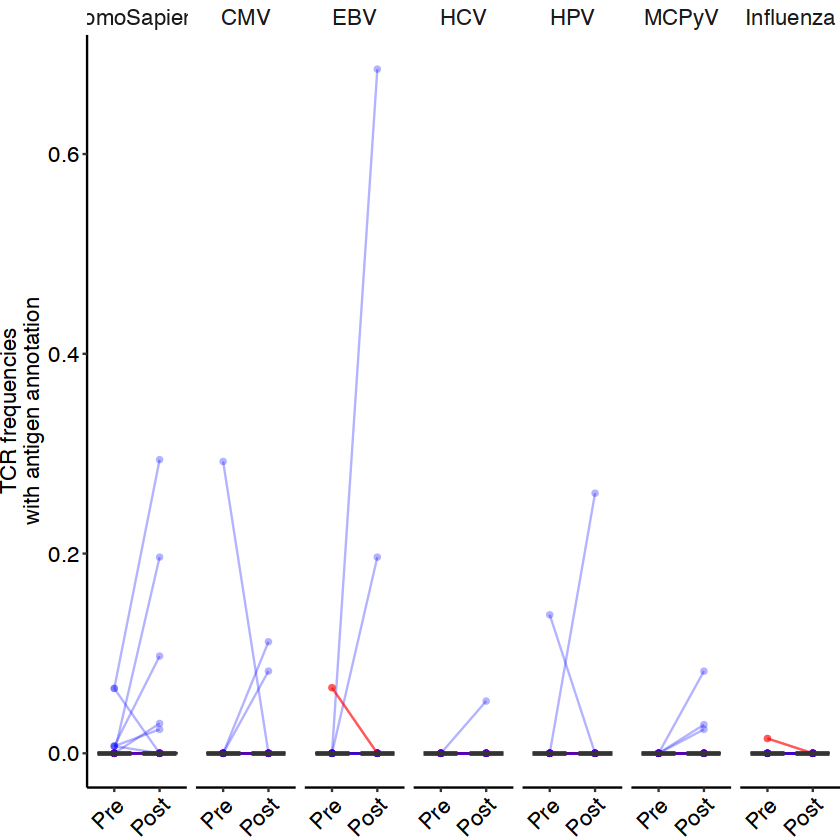

In [270]:
p_sample_cancer

In [271]:
pdf(paste0(plotpath, "antigen_frac_p_solid_cfDNA.pdf"), width = 10, height = 5)
p_sample_cancer
dev.off()

pdf 
  2

# 5- PCA gliph and save

In [ ]:
head(tmp)

In [ ]:
chp_gliph <- tmp[ grepl("CHP", tmp$Sample), ]

In [ ]:
chp_gliph <- chp_gliph[!grepl("Normal", chp_gliph$Sample), ]

In [ ]:
chp_gliph_sum <- chp_gliph %>% 
  group_by(Sample, pattern) %>% 
  summarise(SumFreq = sum(Freq), .groups = 'drop') %>%
  ungroup()

In [ ]:
head(chp_gliph_sum)

In [ ]:
chp_gliph_wide <- tidyr::pivot_wider(chp_gliph_sum[, c("Sample", "pattern", "SumFreq")], names_from = "pattern", values_from = "SumFreq")

In [ ]:
head(chp_gliph_wide)

In [ ]:
chp_gliph_wide <- as.data.frame(chp_gliph_wide)
rownames(chp_gliph_wide) <- chp_gliph_wide$Sample
chp_gliph_wide$Sample <- NULL

In [ ]:
chp_gliph_wide <- as.matrix(chp_gliph_wide)

In [ ]:
head(chp_gliph_wide)

In [ ]:
chp_gliph_wide[is.na(chp_gliph_wide)] <- 0

In [ ]:
head(chp_gliph_wide)

In [ ]:
# pbmc <- chp_gliph_wide[grepl("PBMC", rownames(chp_gliph_wide)),]
chp_gliph_wide <- chp_gliph_wide[, colSums(chp_gliph_wide > 0) > 0]

In [ ]:
mypca <- prcomp(chp_gliph_wide, center = TRUE, scale. = TRUE)

In [ ]:
# plot PCA with factoextra
viz_pca <- fviz_pca_ind(mypca,
    col.ind = as.vector(gsub(":.*", "", rownames(chp_gliph_wide))),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

In [ ]:
# scree plot
fviz_eig(mypca)

In [ ]:
viz_pca #+ coord_cartesian(xlim=c(-2, 10), ylim=c(-2, 10) )

In [ ]:
mypca$x[ mypca$x[,1] > 400 ,, drop = FALSE]

In [ ]:
chp_gliph_wide["Leukemia:CHP_359_X03-PBMC", , drop = FALSE]

In [ ]:
readr::write_rds(mypca, file = paste0(datapath, "GLIPH/gliph_PCA.rds"))